In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
portfolio = pd.read_json('portfolio.json', orient = 'records', lines = True)
profile = pd.read_json('profile.json', orient = 'records', lines = True)
transcript = pd.read_json('transcript.json', orient = 'records', lines = True)

In [3]:
portfolio

reward                      channels  difficulty  duration     offer_type  \
0      10       [email, mobile, social]          10         7           bogo   
1      10  [web, email, mobile, social]          10         5           bogo   
2       0          [web, email, mobile]           0         4  informational   
3       5          [web, email, mobile]           5         7           bogo   
4       5                  [web, email]          20        10       discount   
5       3  [web, email, mobile, social]           7         7       discount   
6       2  [web, email, mobile, social]          10        10       discount   
7       0       [email, mobile, social]           0         3  informational   
8       5  [web, email, mobile, social]           5         5           bogo   
9       2          [web, email, mobile]          10         7       discount   

                                 id  
0  ae264e3637204a6fb9bb56bc8210ddfd  
1  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  3f207df678b143eea3cee63160fa8bed  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7  
5  2298d6c36e964ae4a3e7e9706d1fb8c2  
6  fafdcd668e3743c1bb461111dcafc2a4  
7  5a8bc65990b245e5a138643cd4eb9837  
8  f19421c1d4aa40978ebb69ca19b0e20d  
9  2906b810c7d4411798c6938adc9daaa5

In [4]:
portfolio.describe()

reward  difficulty   duration
count  10.000000   10.000000  10.000000
mean    4.200000    7.700000   6.500000
std     3.583915    5.831905   2.321398
min     0.000000    0.000000   3.000000
25%     2.000000    5.000000   5.000000
50%     4.000000    8.500000   7.000000
75%     5.000000   10.000000   7.000000
max    10.000000   20.000000  10.000000

In [5]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [6]:
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [7]:
profile.head()

gender  age                                id  became_member_on    income
0   None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212       NaN
1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
2   None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712       NaN
3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
4   None  118  a03223e636434f42ac4c3df47e8bac43          20170804       NaN

In [8]:
profile.describe()

age  became_member_on         income
count  17000.000000      1.700000e+04   14825.000000
mean      62.531412      2.016703e+07   65404.991568
std       26.738580      1.167750e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       45.000000      2.016053e+07   49000.000000
50%       58.000000      2.017080e+07   64000.000000
75%       73.000000      2.017123e+07   80000.000000
max      118.000000      2.018073e+07  120000.000000

In [9]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [10]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [11]:
profile[profile.gender.isnull() == True].head(10)

gender  age                                id  became_member_on  income
0    None  118  68be06ca386d4c31939f3a4f0e3dd783          20170212     NaN
2    None  118  38fe809add3b4fcf9315a9694bb96ff5          20180712     NaN
4    None  118  a03223e636434f42ac4c3df47e8bac43          20170804     NaN
6    None  118  8ec6ce2a7e7949b1bf142def7d0e0586          20170925     NaN
7    None  118  68617ca6246f4fbc85e91a2a49552598          20171002     NaN
9    None  118  8974fc5686fe429db53ddde067b88302          20161122     NaN
10   None  118  c4863c7985cf408faee930f111475da3          20170824     NaN
11   None  118  148adfcaa27d485b82f323aaaad036bd          20150919     NaN
17   None  118  744d603ef08c4f33af5a61c8c7628d1c          20170801     NaN
23   None  118  2b826eba31074a059d63b0ae8f50b7d5          20170907     NaN

In [12]:
temp = profile[profile.gender.isnull() == True]

In [13]:
temp[temp.income.isnull()==True].count()

gender                 0
age                 2175
id                  2175
became_member_on    2175
income                 0
dtype: int64

This just means that all those entries where age is null, gender is also null and age = 118 is an absurd value. So, these values need to be dropped.

In [14]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [15]:
transcript.head()

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0

In [16]:
transcript.describe()

time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000

In [17]:
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [18]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [19]:
print(transcript.time.max(), 'hours')
print(transcript.time.max() / 24, 'days')

714 hours
29.75 days


In [20]:
portfolio.rename(columns={'id': 'offer_id', 'reward': 'offered_reward'}, inplace=True)

In [21]:
portfolio.head()

offered_reward                      channels  difficulty  duration  \
0              10       [email, mobile, social]          10         7   
1              10  [web, email, mobile, social]          10         5   
2               0          [web, email, mobile]           0         4   
3               5          [web, email, mobile]           5         7   
4               5                  [web, email]          20        10   

      offer_type                          offer_id  
0           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  informational  3f207df678b143eea3cee63160fa8bed  
3           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [22]:
def one_hot_encoder(df, target_column, categories, prefix):
    for i in categories:
        df[f'{prefix}_{i}'] = df[target_column].apply(lambda x: 1 if i in x else 0)

    df = df.drop(target_column,axis=1)

    return df

In [23]:
portfolio = one_hot_encoder(
    df = portfolio,
    target_column = 'channels',
    categories = ['web','email','mobile','social'],
    prefix = 'channel')

In [24]:
portfolio = one_hot_encoder(
    df = portfolio,
    target_column = 'offer_type',
    categories = ['discount','bogo','informational'],
    prefix = 'type')

In [25]:
portfolio.head()

offered_reward  difficulty  duration                          offer_id  \
0              10          10         7  ae264e3637204a6fb9bb56bc8210ddfd   
1              10          10         5  4d5c57ea9a6940dd891ad53e9dbe8da0   
2               0           0         4  3f207df678b143eea3cee63160fa8bed   
3               5           5         7  9b98b8c7a33c4b65b9aebfe6a799e6d9   
4               5          20        10  0b1e1539f2cc45b7b9fa7c272da2e1d7   

   channel_web  channel_email  channel_mobile  channel_social  type_discount  \
0            0              1               1               1              0   
1            1              1               1               1              0   
2            1              1               1               0              0   
3            1              1               1               0              0   
4            1              1               0               0              1   

   type_bogo  type_informational  
0          1                   0  
1          1                   0  
2          0                   1  
3          1                   0  
4          0                   0

In [26]:
portfolio.offer_id

0    ae264e3637204a6fb9bb56bc8210ddfd
1    4d5c57ea9a6940dd891ad53e9dbe8da0
2    3f207df678b143eea3cee63160fa8bed
3    9b98b8c7a33c4b65b9aebfe6a799e6d9
4    0b1e1539f2cc45b7b9fa7c272da2e1d7
5    2298d6c36e964ae4a3e7e9706d1fb8c2
6    fafdcd668e3743c1bb461111dcafc2a4
7    5a8bc65990b245e5a138643cd4eb9837
8    f19421c1d4aa40978ebb69ca19b0e20d
9    2906b810c7d4411798c6938adc9daaa5
Name: offer_id, dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
portfolio['offer_id_encoded'] = le.fit_transform(portfolio['offer_id'])


In [28]:
portfolio

offered_reward  difficulty  duration                          offer_id  \
0              10          10         7  ae264e3637204a6fb9bb56bc8210ddfd   
1              10          10         5  4d5c57ea9a6940dd891ad53e9dbe8da0   
2               0           0         4  3f207df678b143eea3cee63160fa8bed   
3               5           5         7  9b98b8c7a33c4b65b9aebfe6a799e6d9   
4               5          20        10  0b1e1539f2cc45b7b9fa7c272da2e1d7   
5               3           7         7  2298d6c36e964ae4a3e7e9706d1fb8c2   
6               2          10        10  fafdcd668e3743c1bb461111dcafc2a4   
7               0           0         3  5a8bc65990b245e5a138643cd4eb9837   
8               5           5         5  f19421c1d4aa40978ebb69ca19b0e20d   
9               2          10         7  2906b810c7d4411798c6938adc9daaa5   

   channel_web  channel_email  channel_mobile  channel_social  type_discount  \
0            0              1               1               1              0   
1            1              1               1               1              0   
2            1              1               1               0              0   
3            1              1               1               0              0   
4            1              1               0               0              1   
5            1              1               1               1              1   
6            1              1               1               1              1   
7            0              1               1               1              0   
8            1              1               1               1              0   
9            1              1               1               0              1   

   type_bogo  type_informational  offer_id_encoded  
0          1                   0                 7  
1          1                   0                 4  
2          0                   1                 3  
3          1                   0                 6  
4          0                   0                 0  
5          0                   0                 1  
6          0                   0                 9  
7          0                   1                 5  
8          1                   0                 8  
9          0                   0                 2

In [29]:
portfolio_dict = dict(zip(portfolio['offer_id'], portfolio['offer_id_encoded']))

In [30]:
portfolio = portfolio.drop('offer_id',axis=1)

In [31]:
portfolio.rename(columns={'offer_id_encoded': 'offer_id'}, inplace=True)

In [32]:
profile.rename(columns={'id': 'customer_id'}, inplace=True)

In [33]:
profile.became_member_on = pd.to_datetime(profile.became_member_on, format='%Y%m%d')

In [34]:
profile['days_member'] = (pd.to_datetime('today') - profile['became_member_on']).astype('timedelta64[D]').astype(int)

In [35]:
profile.drop(columns='became_member_on', inplace=True)

In [36]:
dropped_profiles = profile[(profile.gender.isnull() == True) | (profile.gender == 'O')].customer_id.values

In [37]:
profile.drop(profile[profile.customer_id.isin(dropped_profiles) == True].index, inplace=True)

In [38]:
profile.reset_index(drop=True, inplace=True)

In [39]:
profile.gender = profile.gender.map({'F':0, 'M':1})

In [40]:
profile.head()

gender  age                       customer_id    income  days_member
0       0   55  0610b486422d4921ae7d2bf64640c50b  112000.0         2593
1       0   75  78afa995795e4d85b5d9ceeca43f5fef  100000.0         2660
2       1   68  e2127556f4f64592b11af22de27a7932   70000.0         2308
3       1   65  389bc3fa690240e798340f5a15918d5c   53000.0         2384
4       1   58  2eeac8d8feae4a8cad5a6af0499a211d   51000.0         2474

In [41]:
profile['customer_id_encoded'] = le.fit_transform(profile['customer_id'])

In [42]:
profile.head()

gender  age                       customer_id    income  days_member  \
0       0   55  0610b486422d4921ae7d2bf64640c50b  112000.0         2593   
1       0   75  78afa995795e4d85b5d9ceeca43f5fef  100000.0         2660   
2       1   68  e2127556f4f64592b11af22de27a7932   70000.0         2308   
3       1   65  389bc3fa690240e798340f5a15918d5c   53000.0         2384   
4       1   58  2eeac8d8feae4a8cad5a6af0499a211d   51000.0         2474   

   customer_id_encoded  
0                  339  
1                 6855  
2                12924  
3                 3190  
4                 2625

In [43]:
profile.isnull().sum()

gender                 0
age                    0
customer_id            0
income                 0
days_member            0
customer_id_encoded    0
dtype: int64

In [44]:
customer_id_dict = dict(zip(profile['customer_id'], profile['customer_id_encoded']))

In [45]:
profile = profile.drop('customer_id',axis=1)

In [46]:
profile.rename(columns={'customer_id_encoded': 'customer_id'}, inplace=True)

In [47]:
transcript.rename(columns={'person': 'customer_id'}, inplace=True)

In [48]:
transcript = transcript[transcript.customer_id.isin(dropped_profiles) == False]

In [49]:
transcript.head()

customer_id           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
5  389bc3fa690240e798340f5a15918d5c  offer received   
7  2eeac8d8feae4a8cad5a6af0499a211d  offer received   
8  aa4862eba776480b8bb9c68455b8c2e1  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
5  {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}     0  
7  {'offer id': '3f207df678b143eea3cee63160fa8bed'}     0  
8  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0

In [50]:
transcript.customer_id = transcript.customer_id.apply(lambda x: customer_id_dict[x])

In [51]:
transcript.head()

customer_id           event  \
0         6855  offer received   
2        12924  offer received   
5         3190  offer received   
7         2625  offer received   
8         9797  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
5  {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}     0  
7  {'offer id': '3f207df678b143eea3cee63160fa8bed'}     0  
8  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0

In [52]:
transcript['value_type'] = transcript.value.apply(lambda x : list(x.keys())[0])
transcript['actual_value'] = transcript.value.apply(lambda x : list(x.values())[0])
transcript.drop(columns='value', inplace=True)

In [53]:
transcript.head()

customer_id           event  time value_type  \
0         6855  offer received     0   offer id   
2        12924  offer received     0   offer id   
5         3190  offer received     0   offer id   
7         2625  offer received     0   offer id   
8         9797  offer received     0   offer id   

                       actual_value  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9  
2  2906b810c7d4411798c6938adc9daaa5  
5  f19421c1d4aa40978ebb69ca19b0e20d  
7  3f207df678b143eea3cee63160fa8bed  
8  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [54]:
offers_df = transcript[transcript['event'] != 'transaction']
transactions_df = transcript[transcript['event'] == 'transaction']

In [55]:
offers_df.rename(columns={'actual_value': 'offer_id'}, inplace=True)
transactions_df.rename(columns={'actual_value': 'amount'}, inplace=True)

C:\Users\Manas\AppData\Local\Temp\ipykernel_21624\4034891870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers_df.rename(columns={'actual_value': 'offer_id'}, inplace=True)
C:\Users\Manas\AppData\Local\Temp\ipykernel_21624\4034891870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_df.rename(columns={'actual_value': 'amount'}, inplace=True)


In [56]:
offers_df.drop(columns='value_type', inplace=True)
transactions_df.drop(columns=['value_type', 'event'], inplace=True)

C:\Users\Manas\AppData\Local\Temp\ipykernel_21624\3960458303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers_df.drop(columns='value_type', inplace=True)
C:\Users\Manas\AppData\Local\Temp\ipykernel_21624\3960458303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_df.drop(columns=['value_type', 'event'], inplace=True)


In [57]:
transactions_df.head()

customer_id  time amount
12654          144     0   0.83
12657         9194     0  34.56
12659         4846     0  13.23
12670        10297     0  19.51
12671        14530     0  18.97

In [58]:
offers_df.head()

customer_id           event  time                          offer_id
0         6855  offer received     0  9b98b8c7a33c4b65b9aebfe6a799e6d9
2        12924  offer received     0  2906b810c7d4411798c6938adc9daaa5
5         3190  offer received     0  f19421c1d4aa40978ebb69ca19b0e20d
7         2625  offer received     0  3f207df678b143eea3cee63160fa8bed
8         9797  offer received     0  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [59]:
offers_df.offer_id = offers_df.offer_id.apply(lambda x: portfolio_dict[x])

C:\Users\Manas\AppData\Local\Temp\ipykernel_21624\3536753960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offers_df.offer_id = offers_df.offer_id.apply(lambda x: portfolio_dict[x])


In [60]:
offers_df.head()

customer_id           event  time  offer_id
0         6855  offer received     0         6
2        12924  offer received     0         2
5         3190  offer received     0         8
7         2625  offer received     0         3
8         9797  offer received     0         0

In [61]:
offers_df = pd.merge(offers_df, portfolio, on='offer_id')

In [62]:
offers_df.head()

customer_id           event  time  offer_id  offered_reward  difficulty  \
0         6855  offer received     0         6               5           5   
1        13493  offer received     0         6               5           5   
2        13733  offer received     0         6               5           5   
3        11073  offer received     0         6               5           5   
4         5025  offer received     0         6               5           5   

   duration  channel_web  channel_email  channel_mobile  channel_social  \
0         7            1              1               1               0   
1         7            1              1               1               0   
2         7            1              1               1               0   
3         7            1              1               1               0   
4         7            1              1               1               0   

   type_discount  type_bogo  type_informational  
0              0          1                   0  
1              0          1                   0  
2              0          1                   0  
3              0          1                   0  
4              0          1                   0

In [63]:
offers_df

customer_id           event  time  offer_id  offered_reward  \
0              6855  offer received     0         6               5   
1             13493  offer received     0         6               5   
2             13733  offer received     0         6               5   
3             11073  offer received     0         6               5   
4              5025  offer received     0         6               5   
...             ...             ...   ...       ...             ...   
146610        11456    offer viewed   714         5               0   
146611         5718    offer viewed   714         5               0   
146612         5150    offer viewed   714         5               0   
146613        13501    offer viewed   714         5               0   
146614         7597    offer viewed   714         5               0   

        difficulty  duration  channel_web  channel_email  channel_mobile  \
0                5         7            1              1               1   
1                5         7            1              1               1   
2                5         7            1              1               1   
3                5         7            1              1               1   
4                5         7            1              1               1   
...            ...       ...          ...            ...             ...   
146610           0         3            0              1               1   
146611           0         3            0              1               1   
146612           0         3            0              1               1   
146613           0         3            0              1               1   
146614           0         3            0              1               1   

        channel_social  type_discount  type_bogo  type_informational  
0                    0              0          1                   0  
1                    0              0          1                   0  
2                    0              0          1                   0  
3                    0              0          1                   0  
4                    0              0          1                   0  
...                ...            ...        ...                 ...  
146610               1              0          0                   1  
146611               1              0          0                   1  
146612               1              0          0                   1  
146613               1              0          0                   1  
146614               1              0          0                   1  

[146615 rows x 14 columns]

In [64]:
received_df = offers_df[offers_df['event']=='offer received']
viewed_df = offers_df[offers_df['event']=='offer viewed']
completed_df = offers_df[offers_df['event']=='offer completed']

In [65]:
aux_df = received_df.copy()

In [66]:
aux_df.rename(columns={'event': 'offer_received'}, inplace=True)
aux_df.offer_received = 1

In [67]:
aux_df

customer_id  offer_received  time  offer_id  offered_reward  \
0              6855               1     0         6               5   
1             13493               1     0         6               5   
2             13733               1     0         6               5   
3             11073               1     0         6               5   
4              5025               1     0         6               5   
...             ...             ...   ...       ...             ...   
145575         8341               1   576         5               0   
145576        12489               1   576         5               0   
145577         1561               1   576         5               0   
145578        14220               1   576         5               0   
145579         9545               1   576         5               0   

        difficulty  duration  channel_web  channel_email  channel_mobile  \
0                5         7            1              1               1   
1                5         7            1              1               1   
2                5         7            1              1               1   
3                5         7            1              1               1   
4                5         7            1              1               1   
...            ...       ...          ...            ...             ...   
145575           0         3            0              1               1   
145576           0         3            0              1               1   
145577           0         3            0              1               1   
145578           0         3            0              1               1   
145579           0         3            0              1               1   

        channel_social  type_discount  type_bogo  type_informational  
0                    0              0          1                   0  
1                    0              0          1                   0  
2                    0              0          1                   0  
3                    0              0          1                   0  
4                    0              0          1                   0  
...                ...            ...        ...                 ...  
145575               1              0          0                   1  
145576               1              0          0                   1  
145577               1              0          0                   1  
145578               1              0          0                   1  
145579               1              0          0                   1  

[65585 rows x 14 columns]

In [68]:
aux_df.rename(columns={'time': 'offer_start_time'}, inplace=True)
aux_df['offer_end_time'] = aux_df.offer_start_time + aux_df.duration * 24

In [69]:
def expand_list_to_columns(df, target_column, column_labels):
    df = df[target_column].apply(pd.Series).merge(df, left_index=True, right_index=True)
    df = df.rename(columns=column_labels)
    df = df.drop(columns=target_column)
    return df

In [70]:
def get_offer_engagements(aux_df, viewed_df, completed_df, transactions_df):
    customer_id = aux_df['customer_id']
    offer_id = aux_df['offer_id']
    offer_start_time = aux_df['offer_start_time']
    offer_end_time = aux_df['offer_end_time']

    viewed_time_list = viewed_df.loc[
        (viewed_df['customer_id'] == customer_id) &
        (viewed_df['offer_id'] == offer_id) &
        (viewed_df['time'] >= offer_start_time) &
        (viewed_df['time'] <= offer_end_time)
    ]['time'].tolist()
    
    offer_viewed_time = np.NaN if not viewed_time_list else viewed_time_list[0]
    
    if aux_df['type_informational'] == 0:
        completed_time_list = completed_df.loc[
            (completed_df['customer_id'] == customer_id) &
            (completed_df['offer_id'] == offer_id) &
            (completed_df['time'] >= offer_viewed_time) &
            (completed_df['time'] <= offer_end_time )
        ]['time'].tolist()
    
    if aux_df['type_informational'] == 1:        
        customer_transactions = transactions_df.loc[
            (transactions_df.customer_id == customer_id)
        ]['time'].tolist()
      
        completed_time_list = []

        for transaction_time in customer_transactions:            
            if ((transaction_time >= offer_viewed_time) &
                (transaction_time <= offer_end_time)):
                completed_time_list.append(transaction_time)

    offer_completed_time = np.NaN if not completed_time_list else completed_time_list[0]
    output_value = [offer_viewed_time, offer_completed_time]

    return output_value

In [73]:
aux_df['output_value'] = ''
aux_df.output_value = aux_df.apply(
    lambda x: get_offer_engagements(x, viewed_df, completed_df, transactions_df), axis=1)

In [75]:
aux_df = expand_list_to_columns(aux_df, 'output_value', {0: 'offer_viewed_time', 1: 'offer_completed_time'})

In [76]:
aux_df[['offer_start_time', 'offer_end_time', 'offer_viewed_time', 'offer_completed_time']].head(15)

offer_start_time  offer_end_time  offer_viewed_time  offer_completed_time
0                  0             168                6.0                 132.0
1                  0             168                NaN                   NaN
2                  0             168               48.0                   NaN
3                  0             168               30.0                  66.0
4                  0             168                NaN                   NaN
5                  0             168               18.0                   NaN
6                  0             168               96.0                 156.0
7                  0             168                NaN                   NaN
8                  0             168                NaN                   NaN
9                  0             168                NaN                   NaN
10                 0             168               24.0                   NaN
11                 0             168                0.0                  36.0
12                 0             168                0.0                   0.0
13                 0             168               12.0                  24.0
14                 0             168                6.0                  42.0

In [77]:
aux_df['response_score'] = (aux_df.offer_completed_time - aux_df.offer_viewed_time).apply(lambda x: x if x >= 0 else np.NaN)
aux_df.response_score = np.round((((aux_df.duration * 24) - aux_df.response_score) /(aux_df.duration * 24)), 2).fillna(0)

In [78]:
aux_df[['offer_viewed_time', 'offer_completed_time', 'response_score']].head(15)

offer_viewed_time  offer_completed_time  response_score
0                 6.0                 132.0            0.25
1                 NaN                   NaN            0.00
2                48.0                   NaN            0.00
3                30.0                  66.0            0.79
4                 NaN                   NaN            0.00
5                18.0                   NaN            0.00
6                96.0                 156.0            0.64
7                 NaN                   NaN            0.00
8                 NaN                   NaN            0.00
9                 NaN                   NaN            0.00
10               24.0                   NaN            0.00
11                0.0                  36.0            0.79
12                0.0                   0.0            1.00
13               12.0                  24.0            0.93
14                6.0                  42.0            0.79

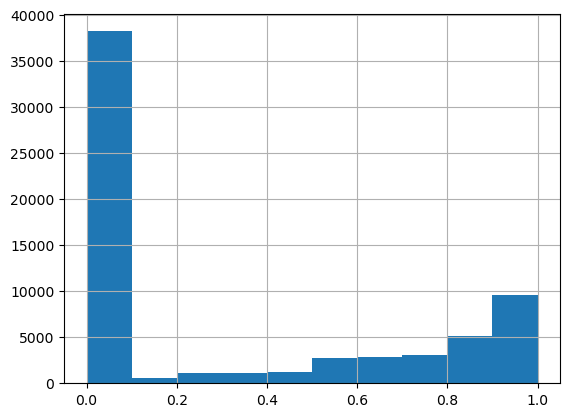

In [79]:
aux_df.response_score.hist();

In [80]:
aux_df['offer_viewed'] = aux_df.offer_viewed_time.apply(lambda x: 0 if pd.isnull(x) else 1)
aux_df['offer_completed'] = aux_df.offer_completed_time.apply(lambda x: 0 if pd.isnull(x) else 1)

In [81]:
aux_df[['offer_viewed_time', 'offer_completed_time', 'offer_viewed', 'offer_completed']].head()

offer_viewed_time  offer_completed_time  offer_viewed  offer_completed
0                6.0                 132.0             1                1
1                NaN                   NaN             0                0
2               48.0                   NaN             1                0
3               30.0                  66.0             1                1
4                NaN                   NaN             0                0

In [82]:
aux_df['redeemed_reward'] = aux_df.offered_reward * aux_df.offer_completed

In [83]:
alpha_df = aux_df[['customer_id','offer_received','offer_viewed','offer_completed','channel_web','channel_email',
                   'channel_mobile','channel_social',]].groupby('customer_id', as_index=True).sum().fillna(0)

beta_df = aux_df[['customer_id','difficulty','duration','offered_reward','redeemed_reward',
                  'response_score',]].groupby('customer_id', as_index=True).mean().fillna(0)

In [89]:
portfolio

offered_reward  difficulty  duration  channel_web  channel_email  \
0              10          10         7            0              1   
1              10          10         5            1              1   
2               0           0         4            1              1   
3               5           5         7            1              1   
4               5          20        10            1              1   
5               3           7         7            1              1   
6               2          10        10            1              1   
7               0           0         3            0              1   
8               5           5         5            1              1   
9               2          10         7            1              1   

   channel_mobile  channel_social  type_discount  type_bogo  \
0               1               1              0          1   
1               1               1              0          1   
2               1               0              0          0   
3               1               0              0          1   
4               0               0              1          0   
5               1               1              1          0   
6               1               1              1          0   
7               1               1              0          0   
8               1               1              0          1   
9               1               0              1          0   

   type_informational  offer_id  
0                   0         7  
1                   0         4  
2                   1         3  
3                   0         6  
4                   0         0  
5                   0         1  
6                   0         9  
7                   1         5  
8                   0         8  
9                   0         2

In [96]:
def split_columns_by_offer_type(df, target_columns):

    aux_columns_list = ['customer_id', 'offer_id']
    for column in target_columns:
        aux_columns_list.append(column)

    aux_df = pd.pivot_table(df[aux_columns_list],index='customer_id', columns='offer_id',fill_value=0, aggfunc='mean')

    aux_df.columns = aux_df.columns.map('{0[0]}_oid_{0[1]}'.format)

    bogo_oids = [4,6,7,8]
    disc_oids = [0,1,2,9]
    info_oids = [3,5]

    output_df = pd.DataFrame()

    for column in target_columns:

        bogo_value = 0
        disc_value = 0
        info_value = 0

        for i in bogo_oids:
            bogo_value += aux_df[f'{column}_oid_{i}']

        for i in disc_oids:
            disc_value += aux_df[f'{column}_oid_{i}']

        for i in info_oids:
            info_value += aux_df[f'{column}_oid_{i}']

        output_df[f'bogo_{column}'] = bogo_value
        output_df[f'disc_{column}'] = disc_value
        output_df[f'info_{column}'] = info_value

    return output_df

In [97]:
gamma_df = split_columns_by_offer_type(aux_df, ['offer_received','offer_viewed','offer_completed','response_score'])

In [98]:
coe = pd.merge(profile.set_index('customer_id'), alpha_df, left_index=True, right_index=True)
coe = pd.merge(coe, beta_df, left_index=True, right_index=True)
coe = pd.merge(coe, gamma_df, left_index=True, right_index=True)

coe.reset_index(inplace=True)

In [99]:
def get_transactions_allotment(df, aux_df, transactions_df):

    customer_id = df['customer_id']
    customer_transactions = transactions_df.loc[(transactions_df.customer_id == customer_id)][['time', 'amount']].values.tolist()

    customer_offers = aux_df.loc[(aux_df.customer_id == customer_id)][['offer_start_time', 'offer_end_time']].values.tolist()

    overall = []

    promo = []

    for transaction in customer_transactions:
        overall.append(transaction)
        txn_time = transaction[0]

        for offer in customer_offers:
            offer_start_time = offer[0]
            offer_end_time = offer[1]
            if txn_time in range(offer_start_time, offer_end_time + 1):
                promo.append(transaction)

    overall = set(tuple(txn) for txn in overall)
    promo = set(tuple(txn) for txn in promo)
    nonpromo = overall - promo

    overall = list(overall)
    promo = list(promo)
    nonpromo = list(nonpromo)

    txn_overall = len(overall)
    amt_overall = np.round(
        sum(overall[i][1] for i in range(len(overall))), 2)

    txn_promo = len(promo)
    amt_promo = np.round(
        sum(promo[i][1] for i in range(len(promo))), 2)

    txn_nonpromo = len(nonpromo)
    amt_nonpromo = np.round(
        sum(nonpromo[i][1] for i in range(len(nonpromo))), 2)

    recency_promo = np.NaN if not promo else promo[-1][0]
    recency_nonpromo = np.NaN if not nonpromo else nonpromo[-1][0]

    output_value = [txn_overall, amt_overall,txn_promo, amt_promo,txn_nonpromo, amt_nonpromo,recency_promo, recency_nonpromo]

    return output_value

In [101]:
coe['output_value'] = ''

coe.output_value = coe.apply(
    lambda x: get_transactions_allotment(x, aux_df, transactions_df), axis=1)

coe = expand_list_to_columns(coe, 'output_value', {
    0: 'txn_overall',
    1: 'amt_overall',
    2: 'txn_promo',
    3: 'amt_promo',
    4: 'txn_nonpromo',
    5: 'amt_nonpromo',
    6: 'recency_promo',
    7: 'recency_nonpromo'})

coe['monetary_promo'] = np.round(coe.amt_promo / coe.txn_promo, 2)
coe['monetary_nonpromo'] = np.round(coe.amt_nonpromo / coe.txn_nonpromo, 2)

coe['frequency_promo'] = np.round(coe.recency_promo / coe.txn_promo, 2)
coe['frequency_nonpromo'] = np.round(coe.recency_nonpromo / coe.txn_promo, 2)

In [104]:
def add_rfm_scores(df, bins=5):
    value_columns = ['recency_promo','frequency_promo','monetary_promo','recency_nonpromo', 
                        'frequency_nonpromo', 'monetary_nonpromo']
    rank_columns = ['recency_promo_rank', 'frequency_promo_rank', 'monetary_promo_rank',
        'recency_nonpromo_rank', 'frequency_nonpromo_rank', 'monetary_nonpromo_rank']

    for rank, value in zip(rank_columns, value_columns):
        df[rank] = ((pd.qcut(
            df[value], bins, labels=False) + 1).fillna(0)).astype(int)

    df['rfm_promo_score'] = np.round(
        ((df[rank_columns[0]] +
        df[rank_columns[1]] +
        df[rank_columns[2]]) / 3), 2)

    df['rfm_nonpromo_score'] = np.round(
        ((df[rank_columns[3]] +
        df[rank_columns[4]] +
        df[rank_columns[5]]) / 3) , 2)

    df = df.drop(columns=value_columns)
    df = df.drop(columns=rank_columns)

    return df

In [105]:
coe = add_rfm_scores(coe)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [107]:
coe[['rfm_promo_score', 'rfm_nonpromo_score']].head()

rfm_promo_score  rfm_nonpromo_score
0             4.67                4.00
1             2.67                4.33
2             4.33                4.00
3             1.67                0.00
4             2.33                0.00

In [108]:
coe['amt_per_test_hour'] = np.round(coe.amt_overall / transactions_df.time.max(), 6)
coe['amt_per_member_day'] = np.round(coe.amt_overall / coe.days_member, 6)
coe['amt_per_income'] = np.round(coe.amt_overall / coe.income, 6)

In [109]:
coe.drop(columns='customer_id', inplace=True)

In [110]:
coe.shape

(14608, 39)

In [113]:
coe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14608 entries, 0 to 14607
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   txn_overall           14608 non-null  float64
 1   amt_overall           14608 non-null  float64
 2   txn_promo             14608 non-null  float64
 3   amt_promo             14608 non-null  float64
 4   txn_nonpromo          14608 non-null  float64
 5   amt_nonpromo          14608 non-null  float64
 6   gender                14608 non-null  int64  
 7   age                   14608 non-null  int64  
 8   income                14608 non-null  float64
 9   days_member           14608 non-null  int32  
 10  offer_received        14608 non-null  int64  
 11  offer_viewed          14608 non-null  int64  
 12  offer_completed       14608 non-null  int64  
 13  channel_web           14608 non-null  int64  
 14  channel_email         14608 non-null  int64  
 15  channel_mobile     

In [112]:
coe.describe()

txn_overall   amt_overall     txn_promo     amt_promo  txn_nonpromo  \
count  14608.000000  14608.000000  14608.000000  14608.000000  14608.000000   
mean       8.362336    116.945208      7.345975    102.591344      1.016361   
std        5.181918    130.141225      5.093051    124.036827      1.234116   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.000000     31.357500      4.000000     24.040000      0.000000   
50%        7.000000     86.910000      6.000000     69.400000      1.000000   
75%       11.000000    160.780000     10.000000    142.352500      2.000000   
max       36.000000   1608.690000     36.000000   1608.690000     10.000000   

       amt_nonpromo        gender           age         income   days_member  \
count  14608.000000  14608.000000  14608.000000   14608.000000  14608.000000   
mean      14.353864      0.580709     54.388896   65437.636911   2739.972549   
std       34.641669      0.493460     17.399666   21633.290544    419.721420   
min        0.000000      0.000000     18.000000   30000.000000   2217.000000   
25%        0.000000      0.000000     42.000000   49000.000000   2425.000000   
50%        2.685000      1.000000     55.000000   64000.000000   2575.000000   
75%       20.060000      1.000000     66.000000   80000.000000   3015.000000   
max      980.380000      1.000000    101.000000  120000.000000   4040.000000   

       ...  disc_offer_completed  info_offer_completed  bogo_response_score  \
count  ...          14608.000000          14608.000000         14608.000000   
mean   ...              0.669182              0.293183             0.445706   
std    ...              0.736681              0.484029             0.582914   
min    ...              0.000000              0.000000             0.000000   
25%    ...              0.000000              0.000000             0.000000   
50%    ...              0.500000              0.000000             0.000000   
75%    ...              1.000000              1.000000             0.850000   
max    ...              4.000000              2.000000             3.790000   

       disc_response_score  info_response_score  rfm_promo_score  \
count         14608.000000         14608.000000     14608.000000   
mean              0.496928             0.218499         2.893951   
std               0.586629             0.381734         1.111696   
min               0.000000             0.000000         0.000000   
25%               0.000000             0.000000         2.000000   
50%               0.300000             0.000000         3.000000   
75%               0.890000             0.405000         3.670000   
max               3.570000             2.000000         5.000000   

       rfm_nonpromo_score  amt_per_test_hour  amt_per_member_day  \
count        14608.000000       14608.000000        14608.000000   
mean             1.667001           0.163789            0.042206   
std              1.666001           0.182271            0.047135   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.043918            0.011409   
50%              1.670000           0.121723            0.032150   
75%              3.330000           0.225182            0.057533   
max              5.000000           2.253067            0.638369   

       amt_per_income  
count    14608.000000  
mean         0.001774  
std          0.001857  
min          0.000000  
25%          0.000567  
50%          0.001315  
75%          0.002416  
max          0.024446  

[8 rows x 39 columns]

In [114]:
coe.isnull().sum()

txn_overall             0
amt_overall             0
txn_promo               0
amt_promo               0
txn_nonpromo            0
amt_nonpromo            0
gender                  0
age                     0
income                  0
days_member             0
offer_received          0
offer_viewed            0
offer_completed         0
channel_web             0
channel_email           0
channel_mobile          0
channel_social          0
difficulty              0
duration                0
offered_reward          0
redeemed_reward         0
response_score          0
bogo_offer_received     0
disc_offer_received     0
info_offer_received     0
bogo_offer_viewed       0
disc_offer_viewed       0
info_offer_viewed       0
bogo_offer_completed    0
disc_offer_completed    0
info_offer_completed    0
bogo_response_score     0
disc_response_score     0
info_response_score     0
rfm_promo_score         0
rfm_nonpromo_score      0
amt_per_test_hour       0
amt_per_member_day      0
amt_per_inco

In [115]:
coe.head()

txn_overall  amt_overall  txn_promo  amt_promo  txn_nonpromo  amt_nonpromo  \
0          3.0        77.01        1.0      23.22           2.0         53.79   
1          7.0       159.27        6.0     135.34           1.0         23.93   
2          3.0        57.73        1.0      18.42           2.0         39.31   
3          3.0        36.43        3.0      36.43           0.0          0.00   
4          4.0        15.62        4.0      15.62           0.0          0.00   

   gender  age    income  days_member  ...  disc_offer_completed  \
0       0   55  112000.0         2593  ...                   0.0   
1       0   75  100000.0         2660  ...                   0.0   
2       1   68   70000.0         2308  ...                   1.0   
3       1   65   53000.0         2384  ...                   2.0   
4       1   58   51000.0         2474  ...                   1.0   

   info_offer_completed  bogo_response_score  disc_response_score  \
0                   0.0                 0.00                 0.00   
1                   1.0                 0.64                 0.00   
2                   0.0                 0.39                 1.00   
3                   0.0                 0.67                 1.09   
4                   0.0                 0.00                 0.55   

   info_response_score  rfm_promo_score  rfm_nonpromo_score  \
0                 0.00             4.67                4.00   
1                 0.92             2.67                4.33   
2                 0.00             4.33                4.00   
3                 0.00             1.67                0.00   
4                 0.00             2.33                0.00   

   amt_per_test_hour  amt_per_member_day  amt_per_income  
0           0.107857            0.029699        0.000688  
1           0.223067            0.059876        0.001593  
2           0.080854            0.025013        0.000825  
3           0.051022            0.015281        0.000687  
4           0.021877            0.006314        0.000306  

[5 rows x 39 columns]

In [146]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [119]:
pca = PCA()
pt = PowerTransformer()

In [120]:
coe_pca = pd.DataFrame(pca.fit_transform(pt.fit_transform(coe)),columns=coe.columns, index=coe.index)

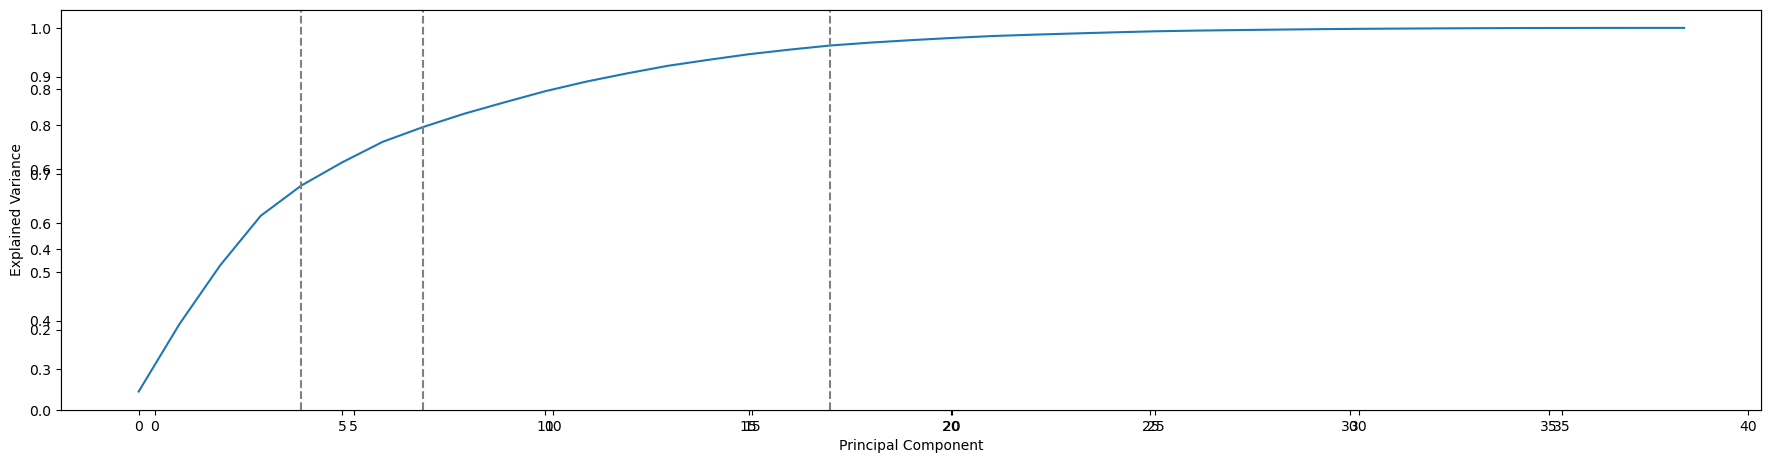

Minimum n_components required for 55% explained variance: 4
Minimum n_components required for 75% explained variance: 7
Minimum n_components required for 95% explained variance: 17


In [122]:
fig = plt.figure(figsize=(17,4))

ax1 = fig.add_axes([0,0,1,1])
ax1.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

ax2 = fig.add_axes([0,0,1,1])
ax2.plot(np.cumsum(pca.explained_variance_ratio_))

ev_list = [0.55, 0.75, 0.95]
n_components_list = []

for ev in ev_list:
    n_components = min(np.where(np.cumsum(pca.explained_variance_ratio_)>ev)[0]+1)
    ax1.axhline(ev, linestyle='dashed', color='grey')
    ax2.axvline(n_components, linestyle='dashed', color='grey')
    n_components_list.append(n_components)

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")

plt.show()

for ev, nc in zip(ev_list, n_components_list):
    print(f'Minimum n_components required for {int(ev*100)}% explained variance: {nc}')

In [123]:
def plot_pca_component(df, pca, component, n_features=5):
    weights = pd.DataFrame(pca.components_, columns=list(df.columns)).iloc[
        component].sort_values(ascending=False)

    aux_df = pd.concat([weights.head(n_features), weights.tail(n_features)])
    plt.figure(figsize=(17,4))
    aux_df.plot(kind='barh', title=f'Principal Component {component}')
    ax = plt.gca()
    ax.set_xlabel('Weight')
    plt.show()


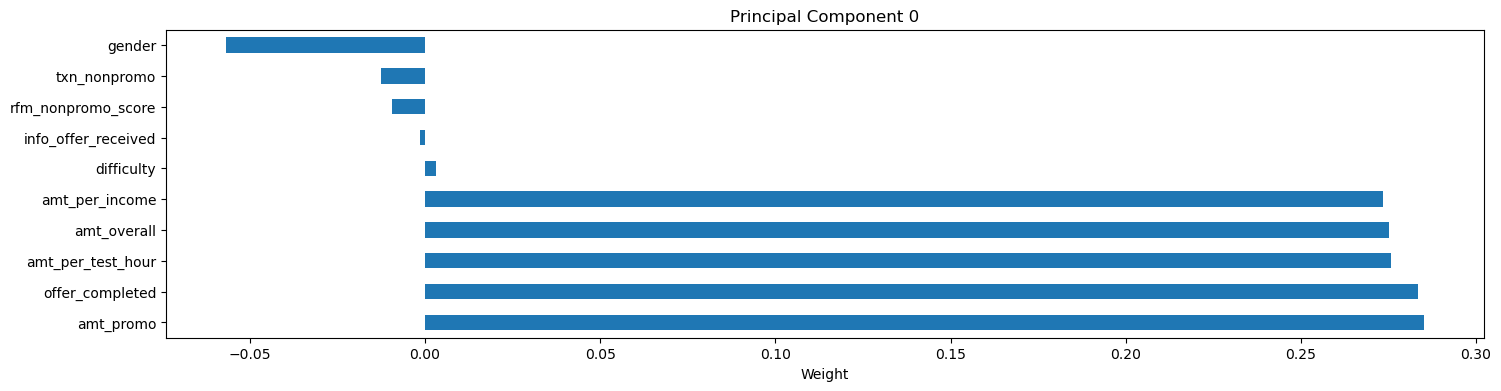

In [124]:
plot_pca_component(coe, pca, 0)

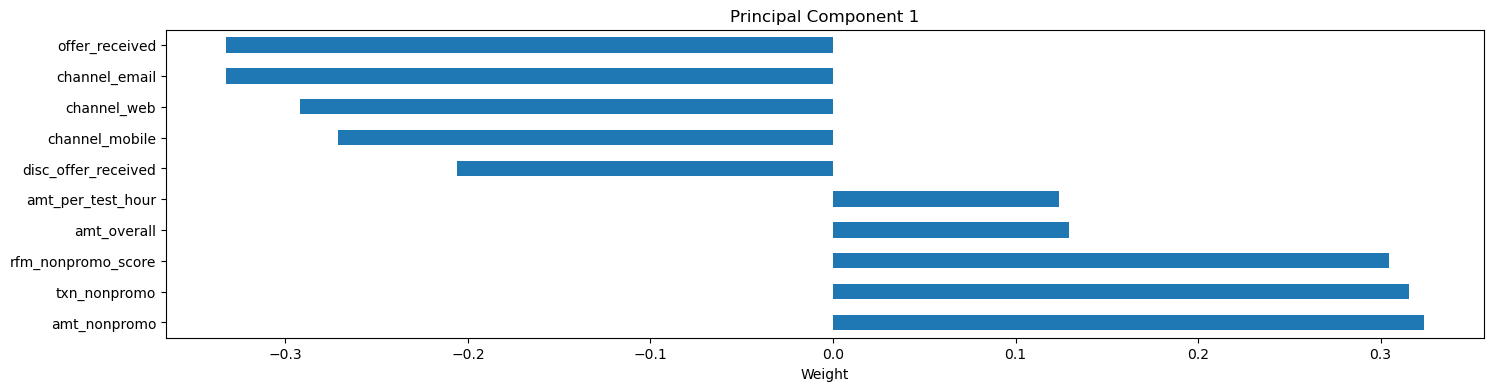

In [125]:
plot_pca_component(coe, pca, 1)

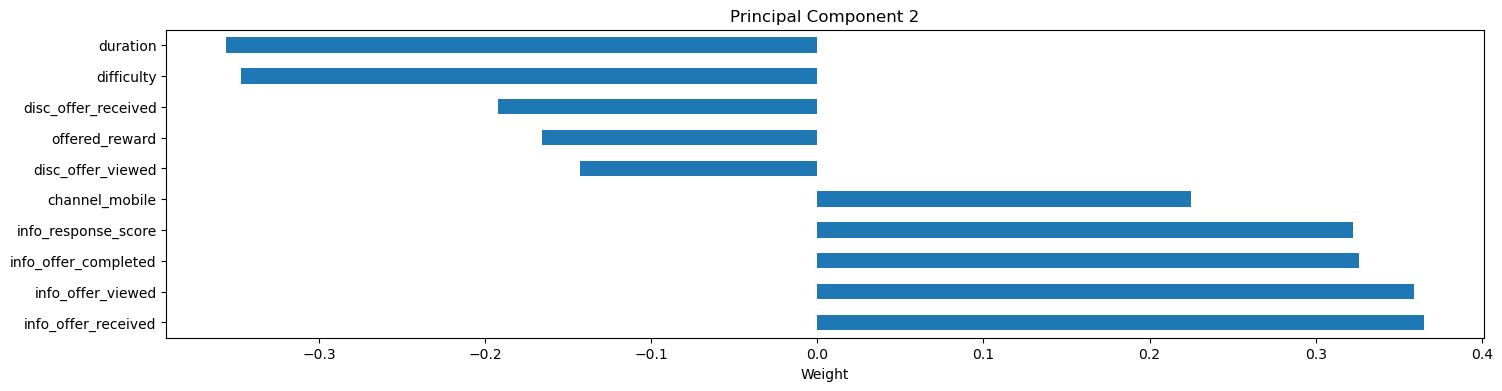

In [126]:
plot_pca_component(coe, pca, 2)

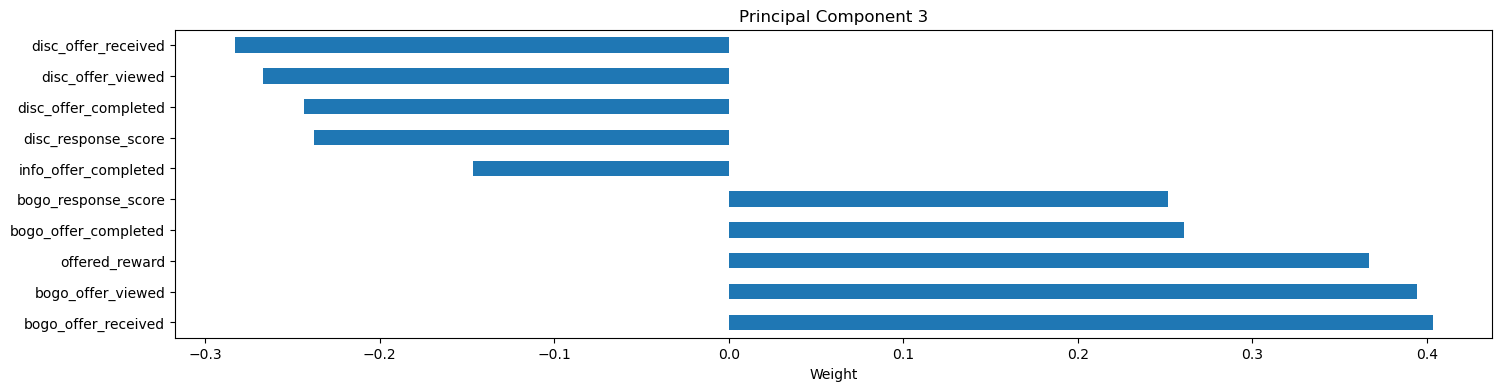

In [127]:
plot_pca_component(coe, pca, 3)

In [131]:
def transform_data(df, ev, tsne=False):

    X = PCA(ev, random_state=42).fit_transform(PowerTransformer().fit_transform(df))

    if tsne == True:
        perplexity = int(X.shape[0] ** 0.5)
        X = TSNE(perplexity=perplexity, random_state=42).fit_transform(X)

    return X


def fit_predict_data(X, n_clusters, est='KMeans'):
    est_dict = {
        'KMeans': KMeans(n_clusters, random_state=42),
        'GaussianMixture': GaussianMixture(n_clusters, random_state=42)}

    model = est_dict[est]
    labels = model.fit_predict(X)

    return model, labels

In [132]:
def plot_optimization_analysis(df, ev, est='KMeans', tsne=False, sample_size=0.05):
    X = transform_data(df, ev, tsne)

    n_clusters = list(range(2, 31))

    if est == 'KMeans':
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))

        sample = X[np.random.choice(
            X.shape[0], int(X.shape[0] * sample_size), replace=False)]

        sil_scores = []
        sse_scores = []

        for i in n_clusters:
            model, labels = fit_predict_data(sample, i, est)
            sil_scores.append(silhouette_score(sample, labels))
            sse_scores.append(np.abs(model.score(X)))

        ax1.plot(n_clusters, sil_scores, linestyle='-', marker='o')
        ax1.locator_params(axis='x', nbins=31)
        ax1.set_title('Silhouette Method')
        ax1.set_xlabel('Clusters')
        ax1.set_ylabel('Silhouette Score')

        ax2.plot(n_clusters, sse_scores, linestyle='-', marker='o')
        ax2.locator_params(axis='x', nbins=31)
        ax2.set_title('Elbow Method')
        ax2.set_xlabel('Clusters')
        ax2.set_ylabel('Sum of Squared Errors')

        transformers = 'PowerTransformer -> PCA'

    if est == 'GaussianMixture':
        fig, ax = plt.subplots(2, 2, figsize=(17,7))

        for trial in list(range(1,5)):

            sample = X[np.random.choice(
                X.shape[0], int(X.shape[0] * sample_size), replace=False)]

            sil_scores = []

            for i in n_clusters:
                model, labels = fit_predict_data(sample, i, est)
                sil_scores.append(silhouette_score(sample, labels))

            ax = plt.subplot(2, 2, trial)
            ax.plot(n_clusters, sil_scores, linestyle='-', marker='o')
            ax.locator_params(axis='x', nbins=31)
            ax.set_title(f'Trial {trial}')
            ax.set_xlabel('Clusters')
            ax.set_ylabel('Silhouette Coefficient')

            transformers = 'PowerTransformer -> PCA -> TSNE'

    fig.tight_layout()

    fig.suptitle(f'Optimal Clusters Analysis for {est} Clustering', size=17)
    fig.subplots_adjust(top=0.86)
    fig.text(0.5, 0.92,
             f'Transformers: {transformers} | PCA EV: {ev} | Sample Size: {sample_size}',
             ha='center',
             size=14)

    plt.show()

C:\Users\Manas\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manas\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manas\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Manas\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

C:\Users\Manas\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


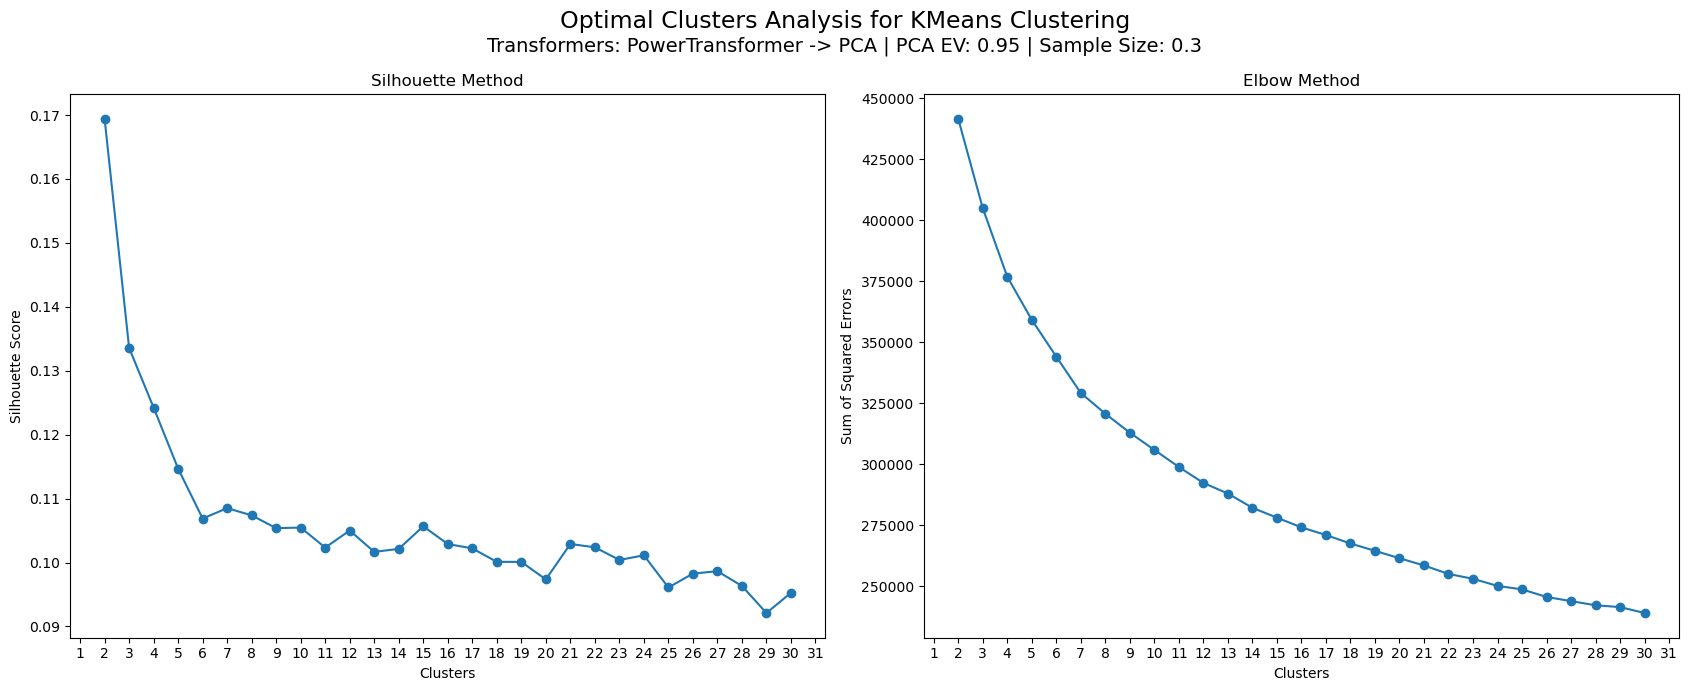

In [141]:
plot_optimization_analysis(df = coe, ev = 0.95, sample_size = 0.3)

In [144]:
def plot_silhouette_analysis(df, ev, n_clusters, est='KMeans', tsne=False):
    X = transform_data(df, ev, tsne)
    model, labels = fit_predict_data(X, n_clusters, est)
    sil_score = silhouette_score(X, labels)
    sil_sample = silhouette_samples(X, labels)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sil_sample[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), color = 'black', fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'))

        y_lower = y_upper + 10

    ax1.set_title('Cluster Silhouette Plot')
    ax1.set_xlabel('Silhouette Coefficient')
    ax1.set_ylabel('Cluster')

    ax1.axvline(x=sil_score, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.Spectral(labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, c=colors)

    transformers = 'PowerTransformer -> PCA -> TSNE'

    if est == 'KMeans':
        centers = model.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", s=300, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        transformers = 'PowerTransformer -> PCA'

    ax2.set_title('Cluster Feature Space Plot')
    ax2.set_xlabel('1st Feature')
    ax2.set_ylabel('2nd Feature')

    fig.tight_layout()

    plt.suptitle((f'Silhouette Analysis for {est} Clustering'), size=17)
    fig.subplots_adjust(top=0.86)
    fig.text(0.5, 0.92,
             f'Transformers: {transformers} - PCA: {ev} - n_clusters: {n_clusters}',
             ha='center',
             size=14)

    plt.show()

C:\Users\Manas\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


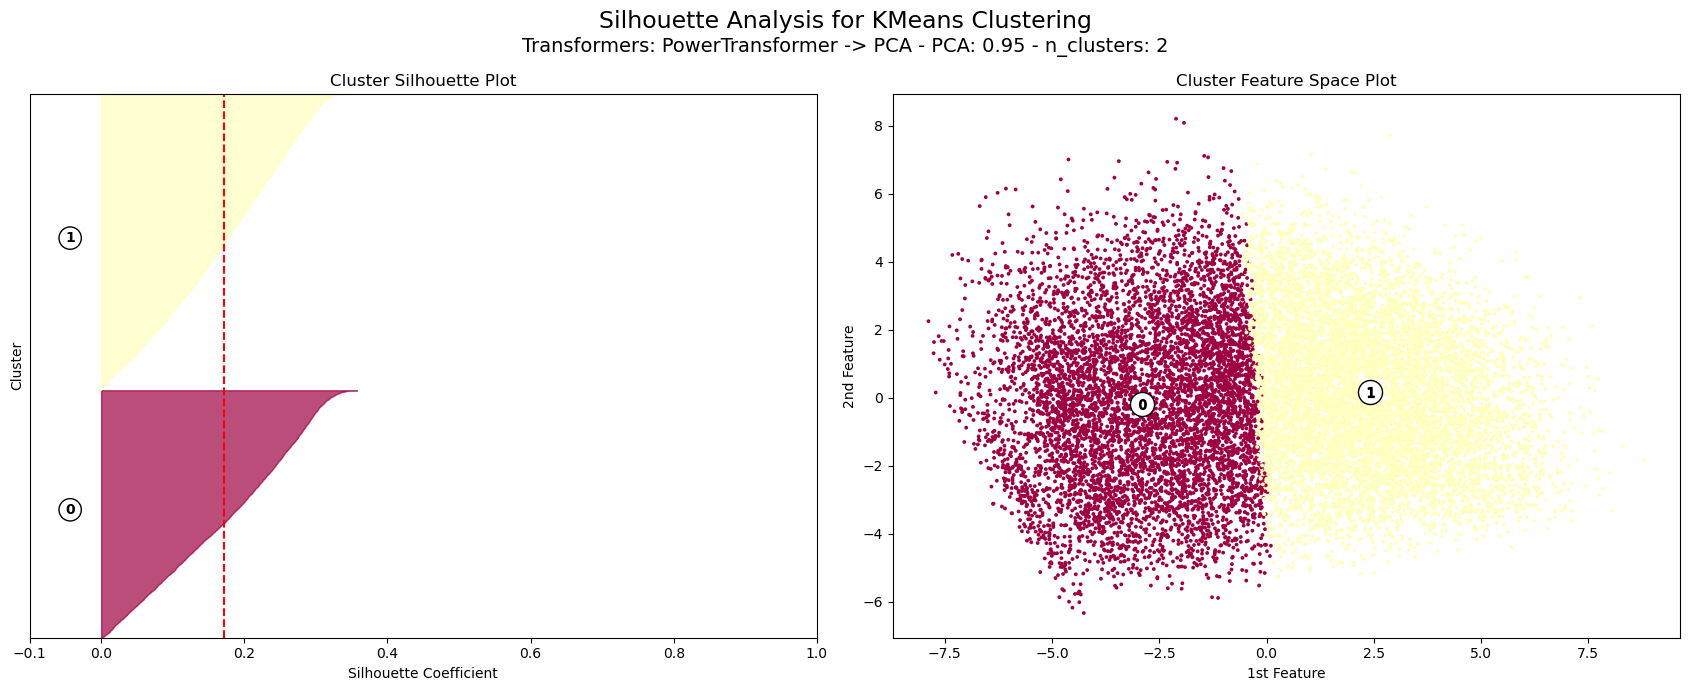

In [149]:
plot_silhouette_analysis(df = coe, ev = 0.95, n_clusters = 2)

C:\Users\Manas\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


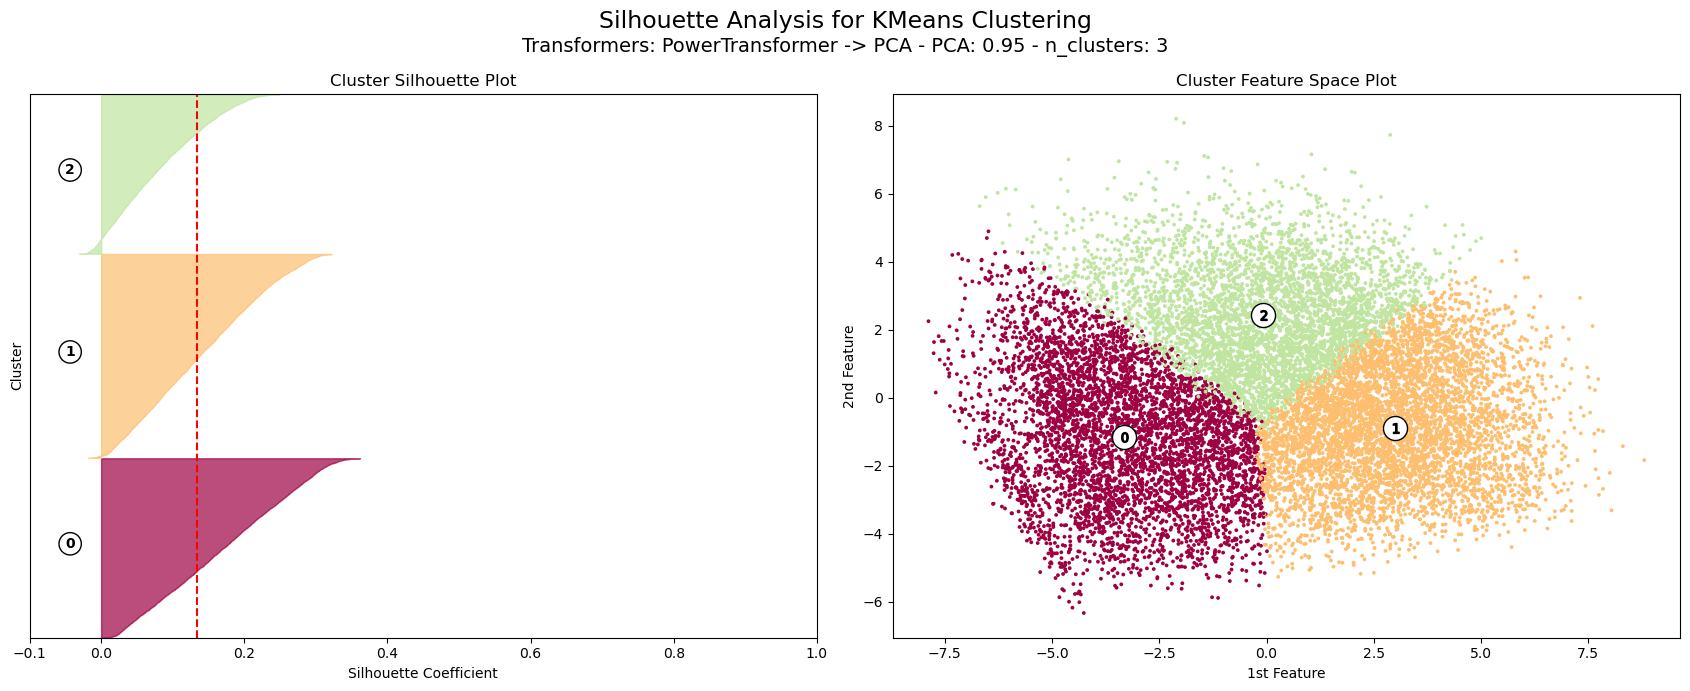

In [150]:
plot_silhouette_analysis(df = coe, ev = 0.95, n_clusters = 3)

C:\Users\Manas\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


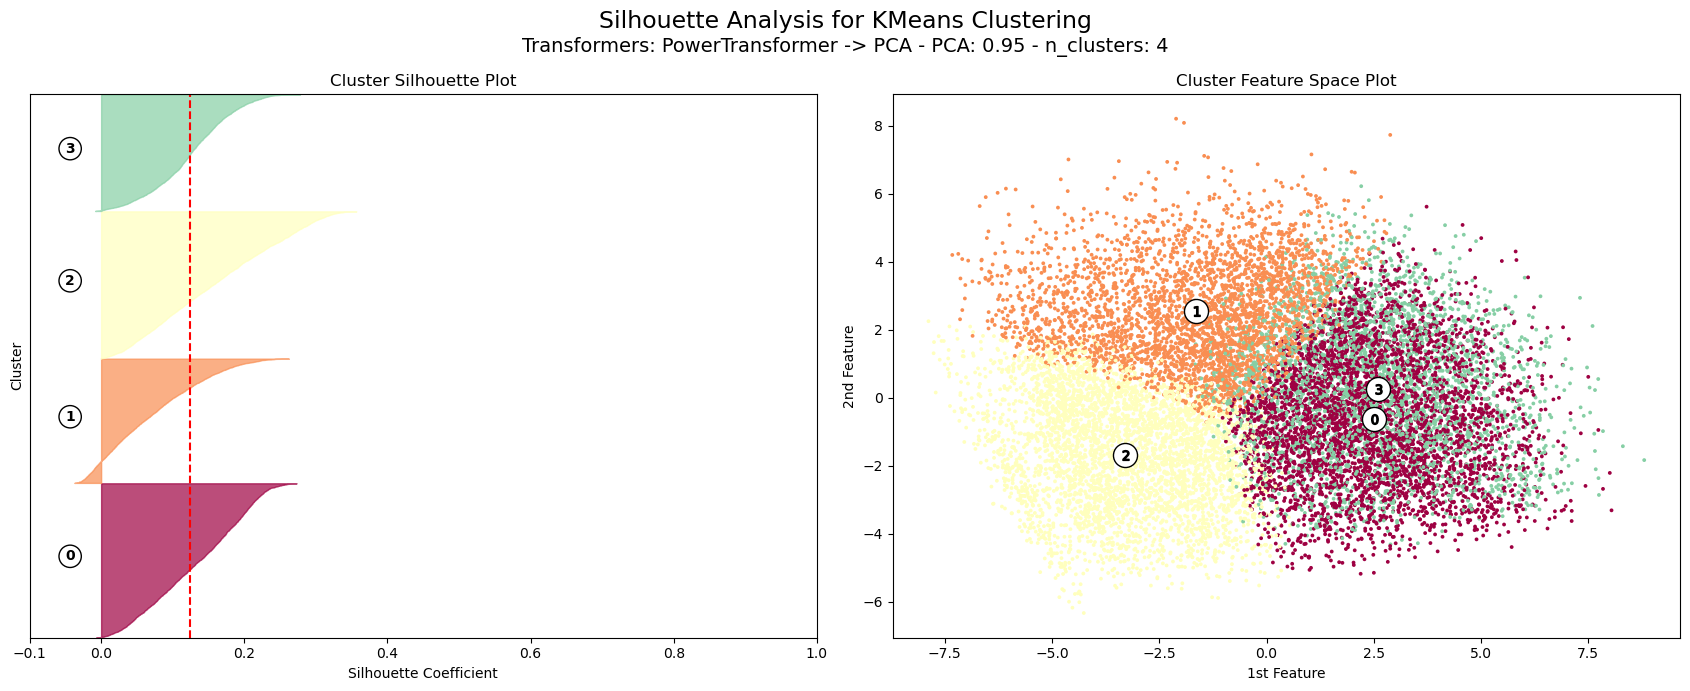

In [151]:
plot_silhouette_analysis(df = coe, ev = 0.95, n_clusters = 4)

C:\Users\Manas\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


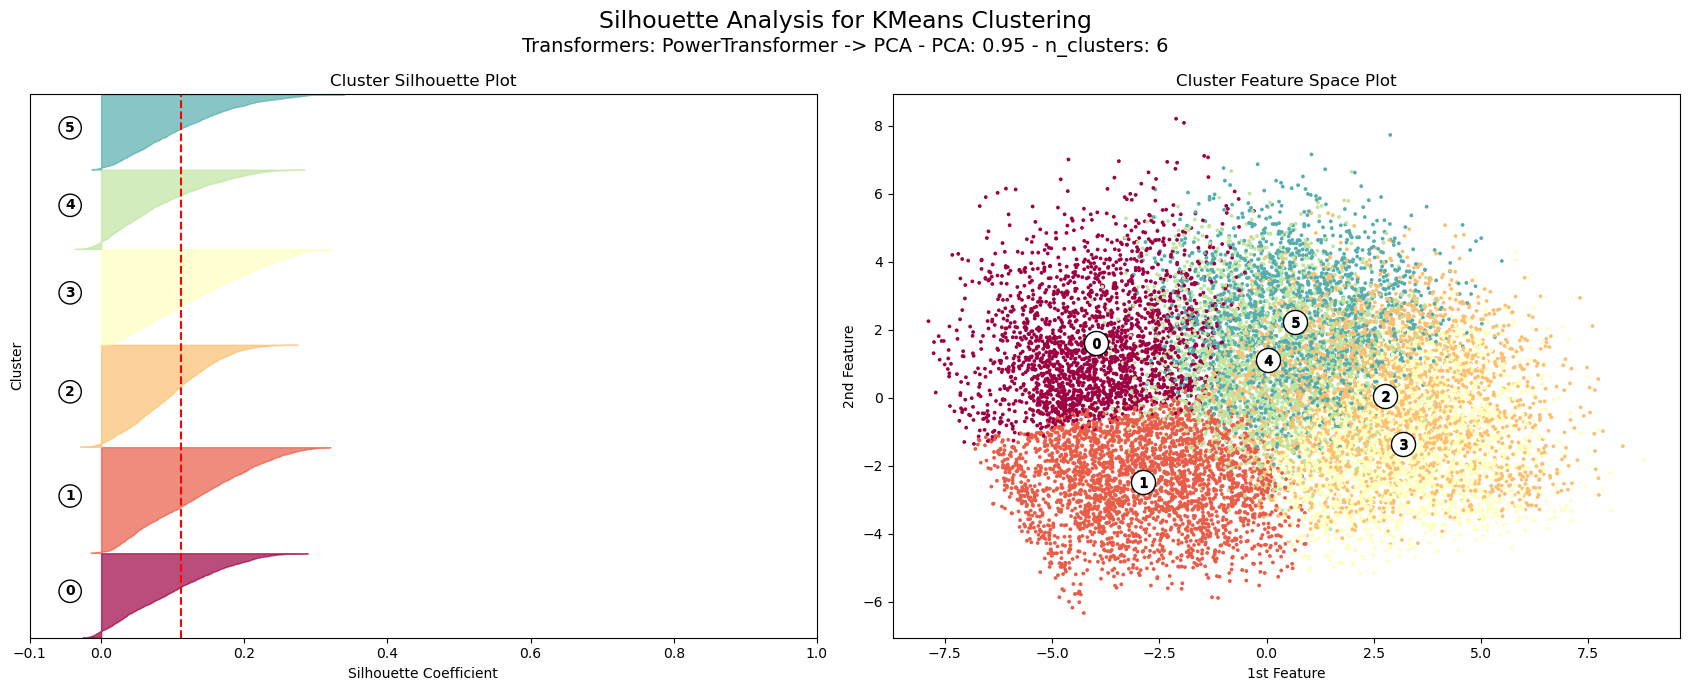

In [152]:
plot_silhouette_analysis(df = coe, ev = 0.95, n_clusters = 6)

In [153]:
n_clusters = 6
ev = 0.95
est = 'KMeans'
X = transform_data(coe, ev)
model, labels = fit_predict_data(X, n_clusters, est)

coe['cluster'] = labels

print(f'{est} with {n_clusters} Clusters\n', 'Silhouette Score: ', np.round(silhouette_score(X, labels), 2))

C:\Users\Manas\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans with 6 Clusters
 Silhouette Score:  0.11


In [155]:
def plot_cluster_analysis(plot, df, target_columns, title, cluster_column='cluster', print_stats=True):

    aux_df = df.copy()

    if (isinstance(target_columns, list)):

        x, y = target_columns[0], target_columns[1]

        aux_df[title] = (aux_df[y] / aux_df[x]).replace([np.nan, np.inf], 0)
        target_columns = title

    if plot == 'scatterplot':

        n_clusters = np.unique(df[cluster_column]).tolist()

        fig, ax = plt.subplots(1, len(n_clusters), figsize=(17,5), sharey=True, sharex=True)

        for i in n_clusters:

            sns.scatterplot(data=df.loc[df[cluster_column]==i], x=x, y=y, ax=ax[i], s=15)
            ax[i].set_title(f'Cluster {i}', size=11)

            ax[i].set_xlabel('')
            ax[i].set_ylabel('')
            fig.text(0.5, 0.04, x, ha='center', size=11)
            fig.text(0.08, 0.5, y, va='center', rotation='vertical', size=11)

            fig.suptitle(title, size=14)
            fig.subplots_adjust(top=0.86)

    if plot != 'scatterplot':
        plt.figure(figsize=(17,5))

        if plot == 'countplot':
            sns.countplot(data=aux_df, x=cluster_column, hue=target_columns)
        if plot == 'violinplot':
            sns.violinplot(data=aux_df, x=cluster_column, y=target_columns)

        plt.title(title)
        plt.ylabel('')
        plt.xlabel('Cluster')

    stats = aux_df.groupby(cluster_column)[target_columns].describe().reset_index()
    stats = stats[['cluster', 'mean', 'min', '50%', 'max']]
    stats.rename(columns={'50%': 'median'}, inplace=True)
    stats = np.round(stats, 2)

    plt.show()
    if print_stats == True:
        print(stats.to_string(index=False))

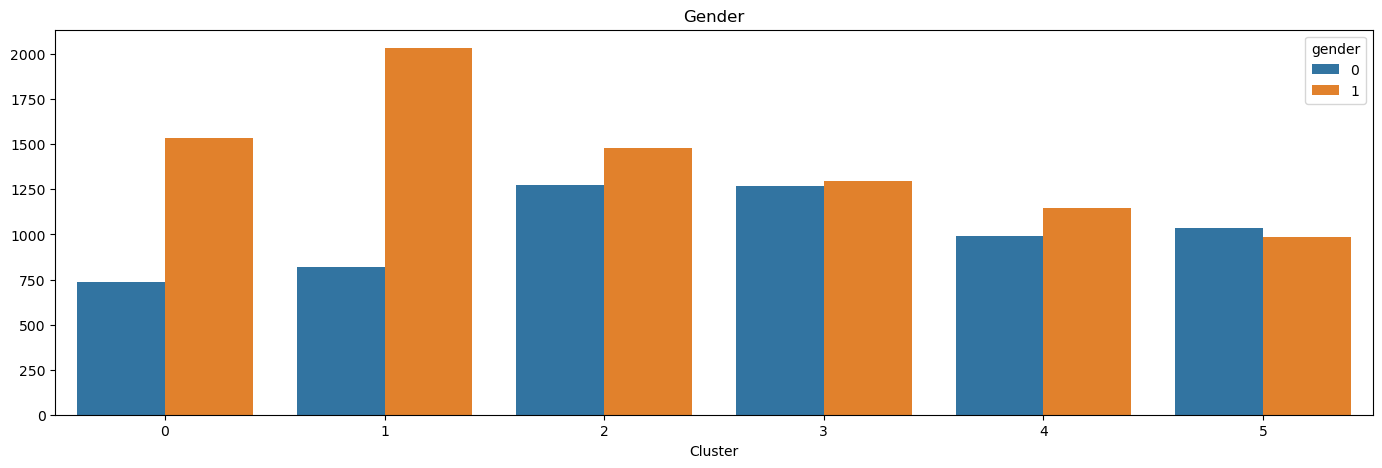

 cluster  mean  min  median  max
       0  0.68  0.0     1.0  1.0
       1  0.71  0.0     1.0  1.0
       2  0.54  0.0     1.0  1.0
       3  0.51  0.0     1.0  1.0
       4  0.54  0.0     1.0  1.0
       5  0.49  0.0     0.0  1.0


In [156]:
plot_cluster_analysis(plot='countplot', df=coe, target_columns='gender',title='Gender')

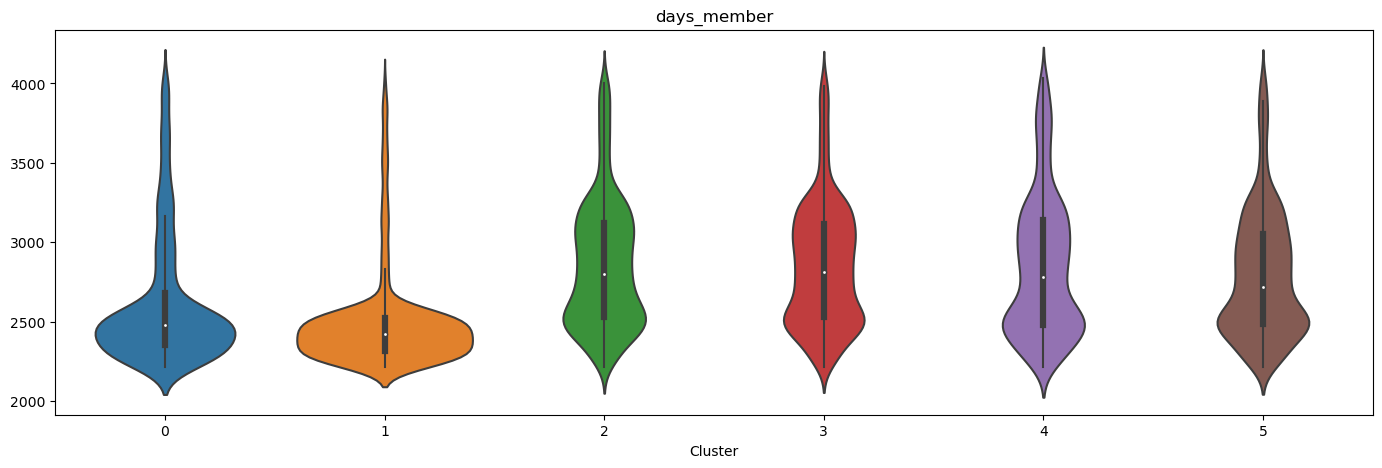

 cluster    mean    min  median    max
       0 2615.36 2217.0  2478.0 4039.0
       1 2491.05 2217.0  2420.0 4027.0
       2 2864.52 2217.0  2803.0 4039.0
       3 2854.93 2217.0  2815.0 4040.0
       4 2854.65 2217.0  2784.5 4036.0
       5 2794.21 2217.0  2719.0 4039.0


In [157]:
plot_cluster_analysis(plot='violinplot', df=coe,target_columns='days_member',title='days_member')

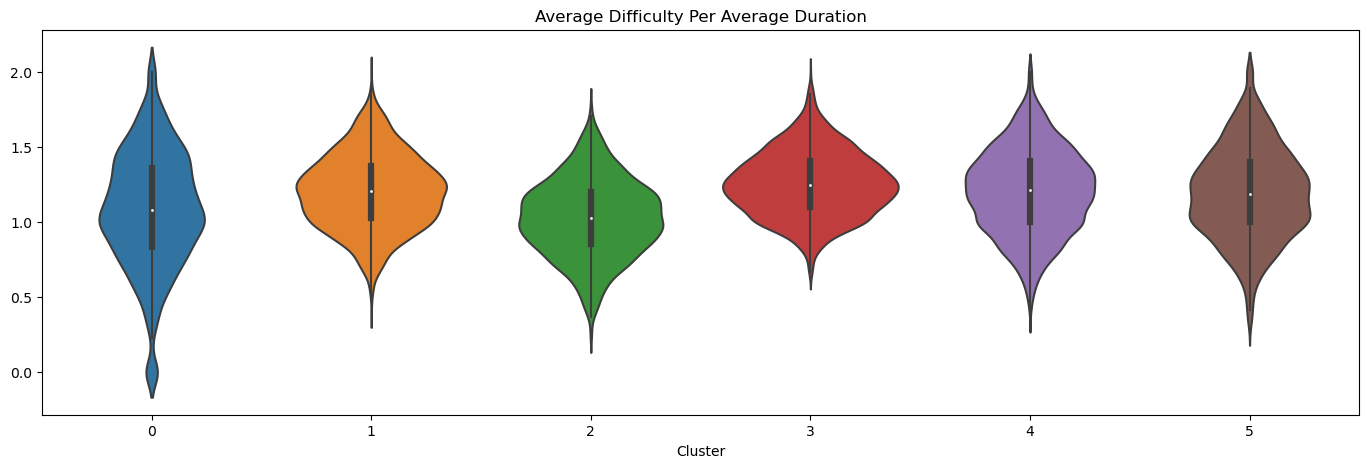

 cluster  mean  min  median  max
       0  1.08 0.00    1.08 2.00
       1  1.21 0.40    1.21 2.00
       2  1.03 0.24    1.03 1.79
       3  1.26 0.65    1.25 2.00
       4  1.21 0.39    1.21 2.00
       5  1.19 0.31    1.19 2.00


In [158]:
plot_cluster_analysis(plot='violinplot', df=coe,target_columns=['duration', 'difficulty'],title='Average Difficulty Per Average Duration')

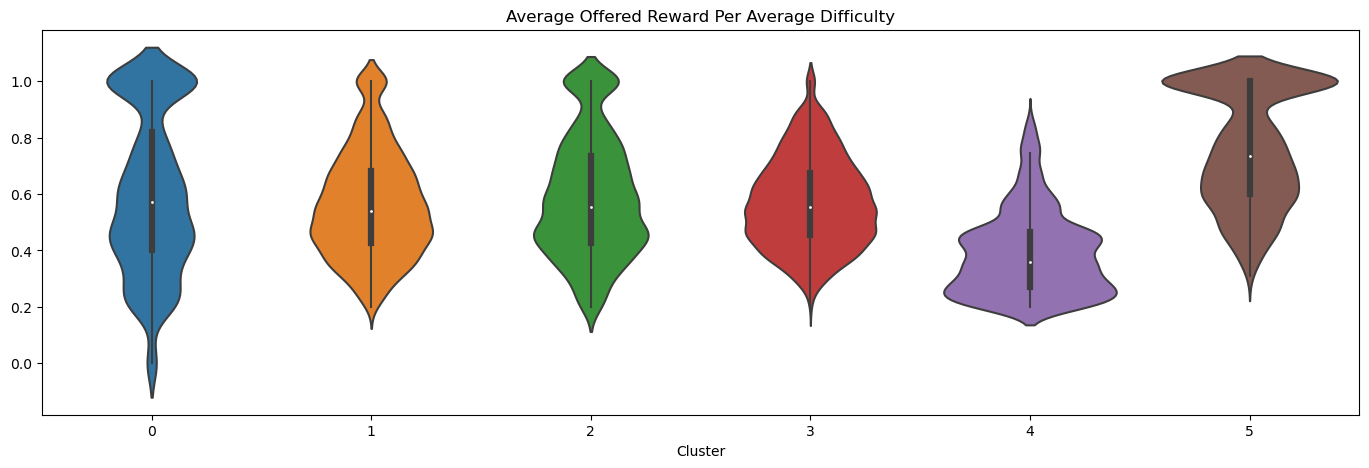

 cluster  mean  min  median  max
       0  0.59 0.00    0.57 1.00
       1  0.56 0.20    0.54 1.00
       2  0.59 0.20    0.56 1.00
       3  0.57 0.20    0.56 1.00
       4  0.39 0.20    0.36 0.88
       5  0.76 0.31    0.73 1.00


In [159]:
plot_cluster_analysis(plot='violinplot', df=coe,target_columns=['difficulty', 'offered_reward'],title='Average Offered Reward Per Average Difficulty')

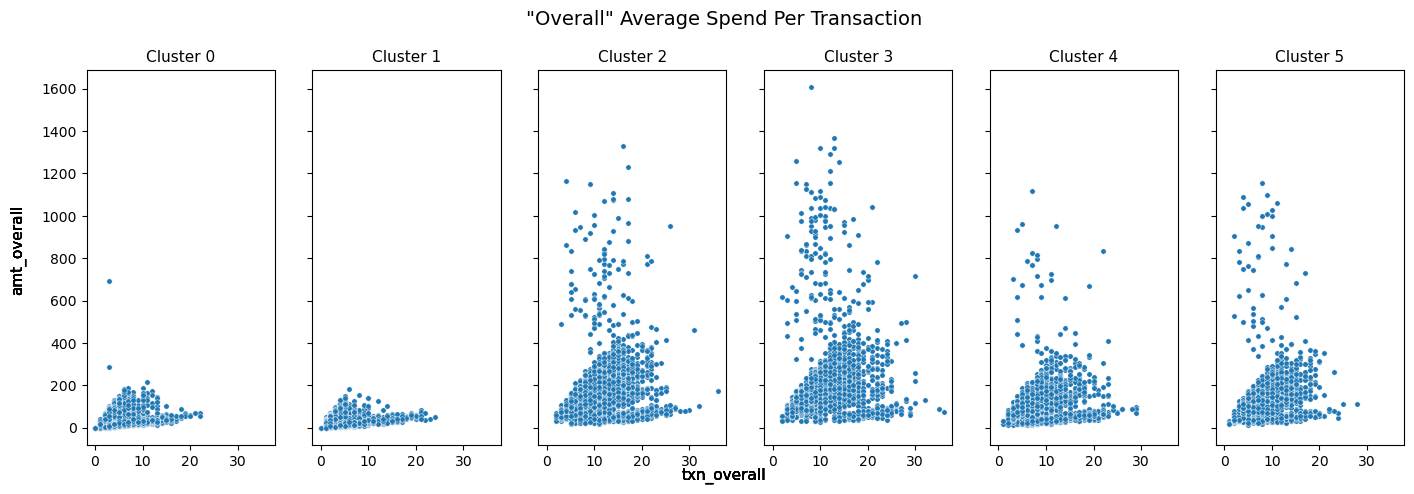

 cluster  mean  min  median    max
       0  8.76 0.00    3.79 231.27
       1  6.69 0.00    3.28  50.08
       2 17.16 1.65   15.94 291.32
       3 21.21 1.60   18.84 307.93
       4 16.86 1.42   16.67 234.63
       5 20.32 1.67   18.68 451.47


In [161]:
plot_cluster_analysis(plot='scatterplot', df=coe,target_columns=['txn_overall', 'amt_overall'],title='"Overall" Average Spend Per Transaction')

In [162]:
def compute_nil_pct(df, target_column, cluster_column='cluster'):

    n_clusters = np.unique(df[cluster_column]).tolist()

    idle_pct = []

    for i in n_clusters:
        pct = df.loc[df[cluster_column]==i][target_column].value_counts(normalize=True)

        if 0 in pct:
            idle_pct.append(pct[0])
        else:
            idle_pct.append(0)

    output_df = pd.DataFrame({'cluster': n_clusters, 'pct': idle_pct})
    output_df['pct'] = np.round(output_df.pct * 100, 1)

    print(output_df.to_string(index=False))

In [163]:
compute_nil_pct(df=coe, target_column='txn_overall')

 cluster  pct
       0  3.2
       1  8.9
       2  0.0
       3  0.0
       4  0.0
       5  0.0


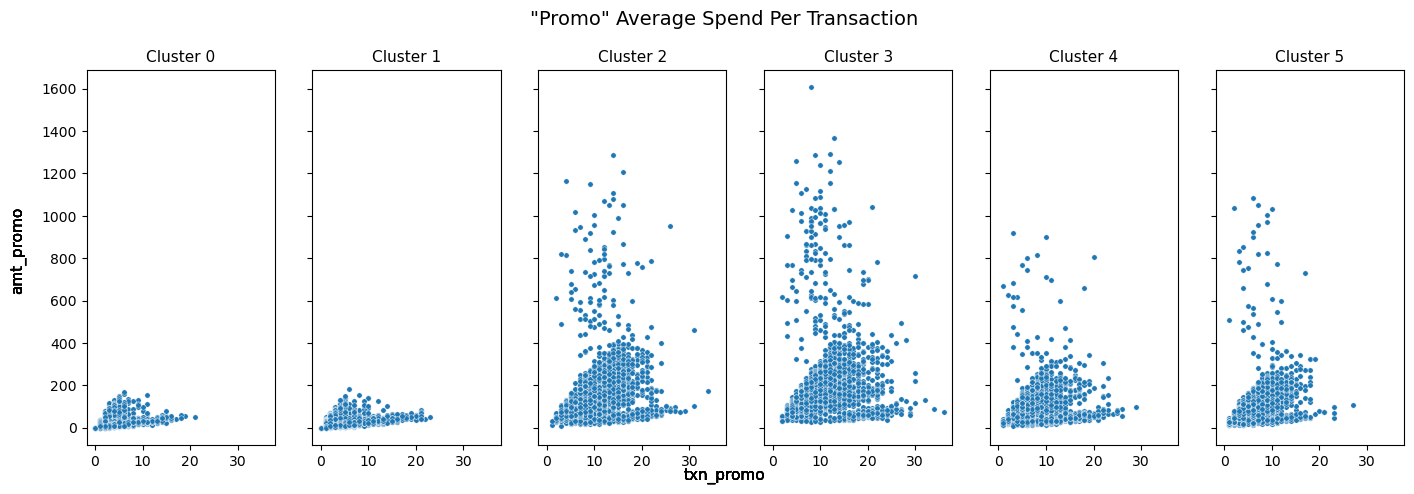

 cluster  mean  min  median    max
       0  7.57 0.00    3.42  39.22
       1  6.58 0.00    3.24  50.08
       2 17.19 1.65   15.88 307.20
       3 21.37 1.60   18.77 307.93
       4 17.34 1.41   16.64 666.86
       5 20.11 1.74   18.45 518.32


In [164]:
plot_cluster_analysis(plot='scatterplot', df=coe,target_columns=['txn_promo', 'amt_promo'],title='"Promo" Average Spend Per Transaction')

In [165]:
compute_nil_pct(df=coe, target_column='txn_promo')

 cluster  pct
       0  9.1
       1  9.6
       2  0.0
       3  0.0
       4  0.0
       5  0.0


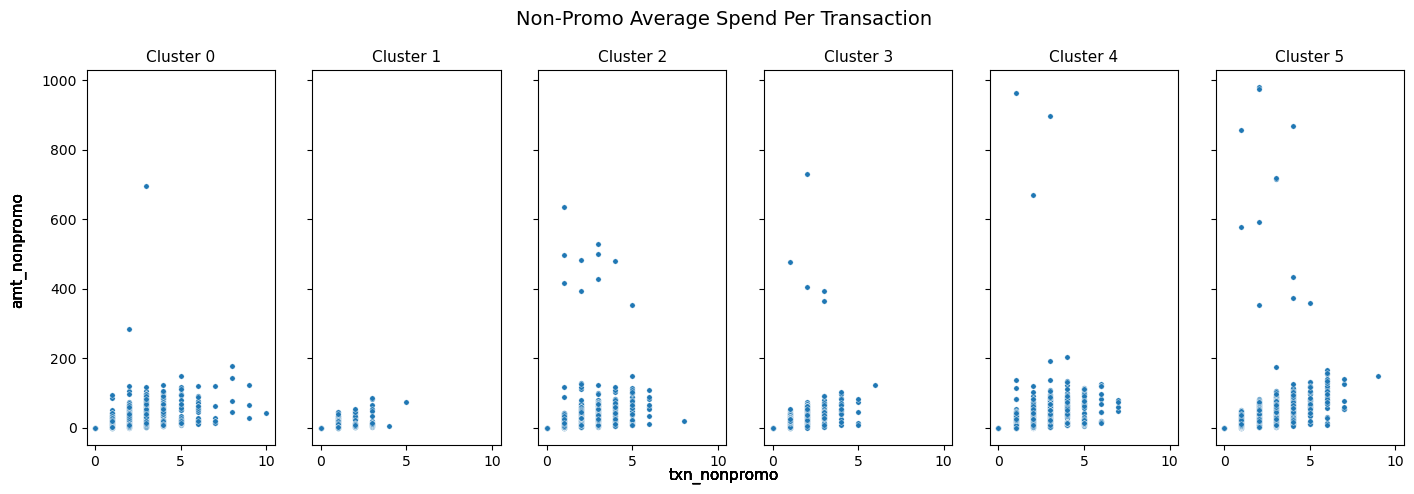

 cluster  mean  min  median    max
       0  7.66  0.0    3.46 231.27
       1  1.25  0.0    0.00  46.67
       2  8.93  0.0    2.69 635.06
       3  5.61  0.0    0.00 476.33
       4 11.66  0.0    8.21 962.10
       5 16.73  0.0   15.25 855.31


In [168]:
plot_cluster_analysis(plot='scatterplot', df=coe, target_columns=['txn_nonpromo', 'amt_nonpromo'],title='Non-Promo Average Spend Per Transaction')

In [170]:
compute_nil_pct(df=coe, target_column='txn_nonpromo')

 cluster  pct
       0 16.5
       1 78.7
       2 44.2
       3 68.4
       4 27.1
       5 13.5


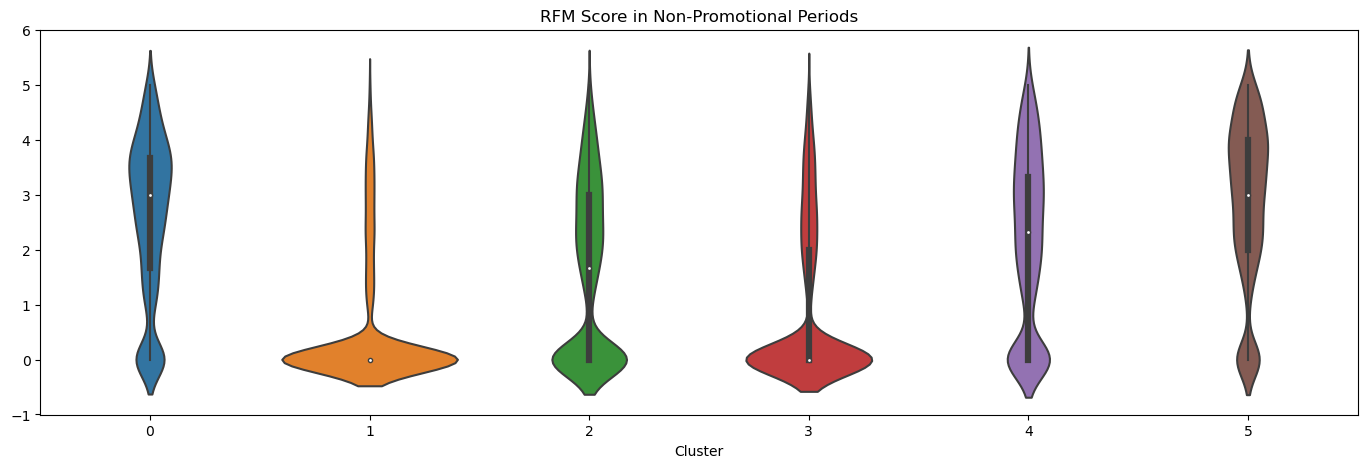

 cluster  mean  min  median  max
       0  2.58  0.0    3.00  5.0
       1  0.56  0.0    0.00  5.0
       2  1.55  0.0    1.67  5.0
       3  0.88  0.0    0.00  5.0
       4  2.15  0.0    2.33  5.0
       5  2.86  0.0    3.00  5.0


In [172]:
plot_cluster_analysis(plot='violinplot', df=coe,target_columns='rfm_nonpromo_score',title='RFM Score in Non-Promotional Periods')

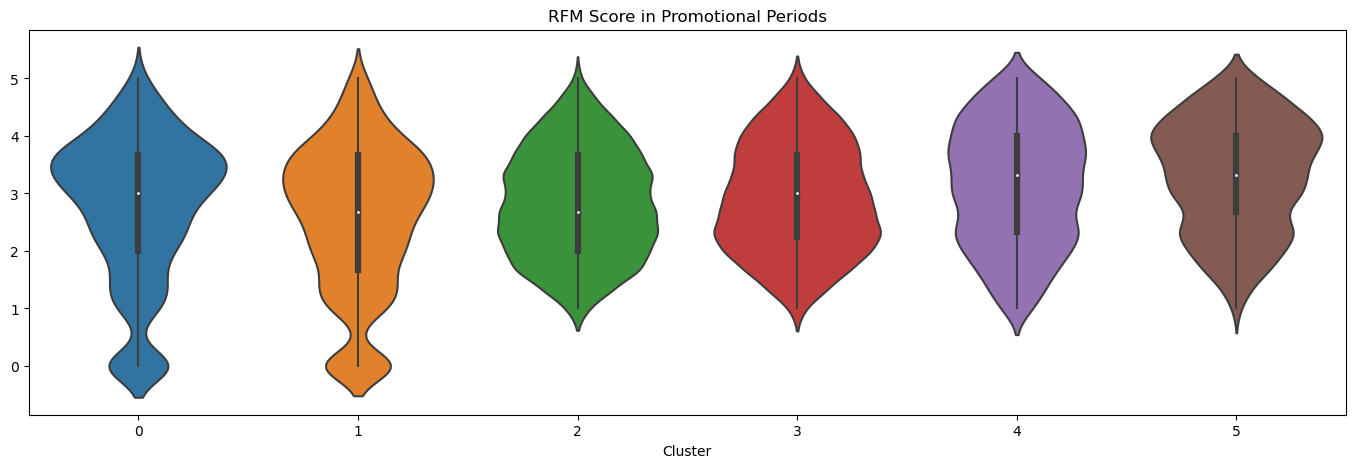

 cluster  mean  min  median  max
       0  2.76  0.0    3.00  5.0
       1  2.57  0.0    2.67  5.0
       2  2.83  1.0    2.67  5.0
       3  2.90  1.0    3.00  5.0
       4  3.14  1.0    3.33  5.0
       5  3.31  1.0    3.33  5.0


In [173]:
plot_cluster_analysis(plot='violinplot', df=coe,target_columns='rfm_promo_score',title='RFM Score in Promotional Periods')

In [174]:
def compute_percentage_change(df, initial, final, cluster_column='cluster'):
    initial_stats = df.groupby(cluster_column)[initial].describe()[
        ['mean', '50%']].rename(columns={'50%': 'median'})

    final_stats = df.groupby(cluster_column)[final].describe()[
        ['mean', '50%']].rename(columns={'50%': 'median'})

    output_df = pd.merge(initial_stats, final_stats,
                         right_index=True, left_index=True,
                         suffixes=('_initial', '_final'))

    output_df = np.round(output_df, 2)
    initial_mean = output_df['mean_initial']
    final_mean = output_df['mean_final']
    initial_median = output_df['median_initial']
    final_median = output_df['median_final']
    output_df['mean_%chnage'] = np.round(
        (final_mean - initial_mean) / initial_mean * 100, 2)

    output_df['median_%chnage'] = np.round(
        (final_median - initial_median) / initial_median * 100, 2)
    output_df = output_df[
        ['mean_initial', 'mean_final', 'mean_%chnage',
        'median_initial', 'median_final', 'median_%chnage']]

    print(output_df.reset_index().to_string(index=False))


In [175]:
compute_percentage_change(coe, 'rfm_nonpromo_score', 'rfm_promo_score')

 cluster  mean_initial  mean_final  mean_%chnage  median_initial  median_final  median_%chnage
       0          2.58        2.76          6.98            3.00          3.00            0.00
       1          0.56        2.57        358.93            0.00          2.67             inf
       2          1.55        2.83         82.58            1.67          2.67           59.88
       3          0.88        2.90        229.55            0.00          3.00             inf
       4          2.15        3.14         46.05            2.33          3.33           42.92
       5          2.86        3.31         15.73            3.00          3.33           11.00


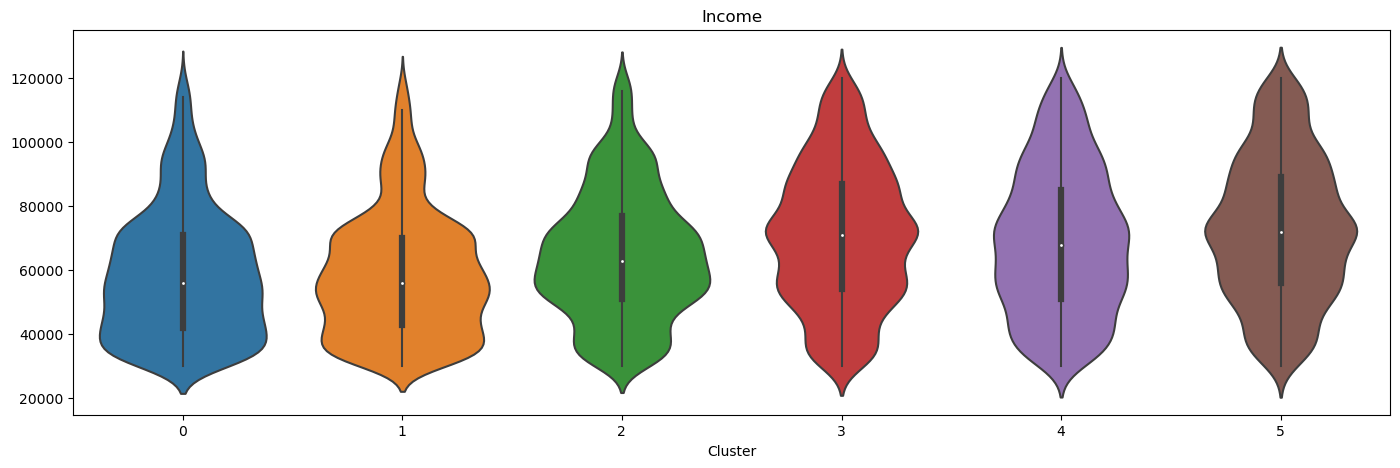

 cluster     mean     min  median      max
       0 58759.14 30000.0 56000.0 120000.0
       1 58573.43 30000.0 56000.0 119000.0
       2 64914.31 30000.0 63000.0 120000.0
       3 70944.31 30000.0 71000.0 120000.0
       4 68889.62 30000.0 68000.0 120000.0
       5 72685.77 30000.0 72000.0 120000.0


In [177]:
plot_cluster_analysis(plot='violinplot', df=coe,target_columns='income',title='Income')

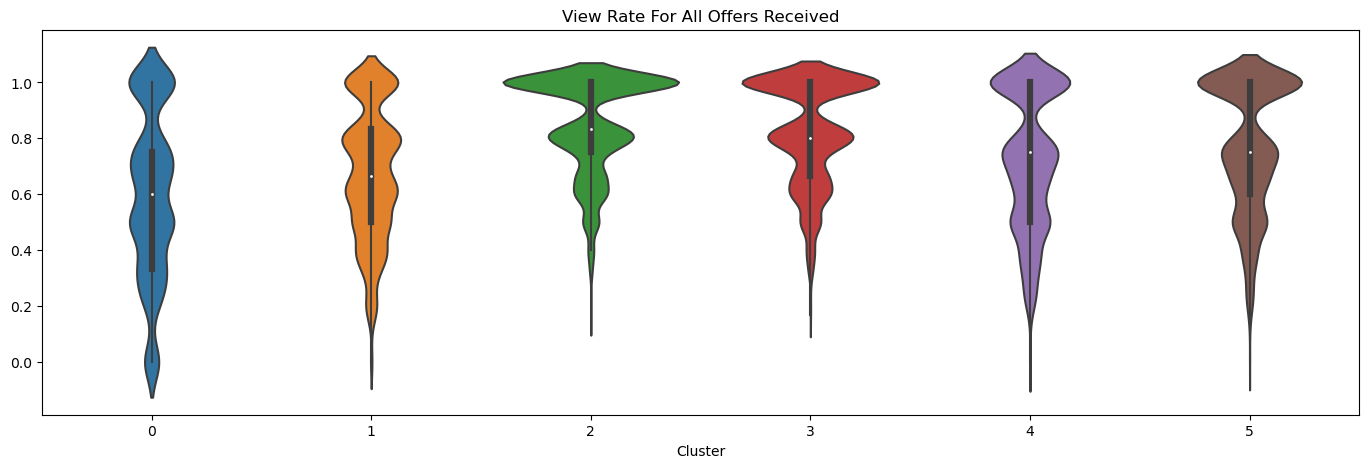

 cluster  mean  min  median  max
       0  0.60 0.00    0.60  1.0
       1  0.67 0.00    0.67  1.0
       2  0.85 0.17    0.83  1.0
       3  0.82 0.17    0.80  1.0
       4  0.72 0.00    0.75  1.0
       5  0.77 0.00    0.75  1.0


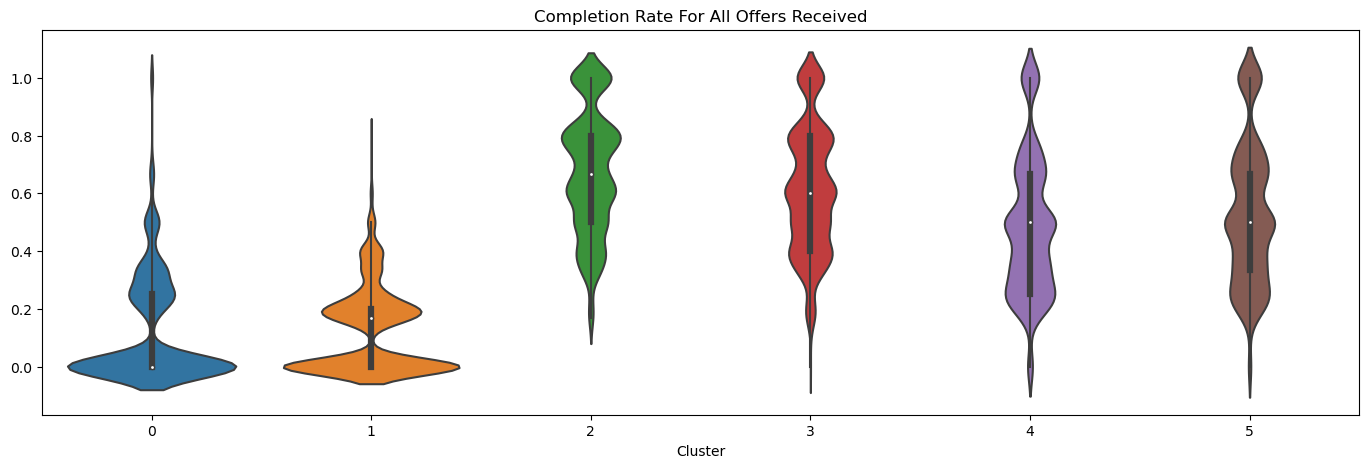

 cluster  mean  min  median  max
       0  0.13 0.00    0.00  1.0
       1  0.13 0.00    0.17  0.8
       2  0.67 0.17    0.67  1.0
       3  0.61 0.00    0.60  1.0
       4  0.48 0.00    0.50  1.0
       5  0.53 0.00    0.50  1.0


In [178]:
for column, title in zip(['offer_viewed', 'offer_completed'], ['View', 'Completion']):
    plot_cluster_analysis(plot='violinplot', df=coe,target_columns=['offer_received', column],title=f'{title} Rate For All Offers Received')

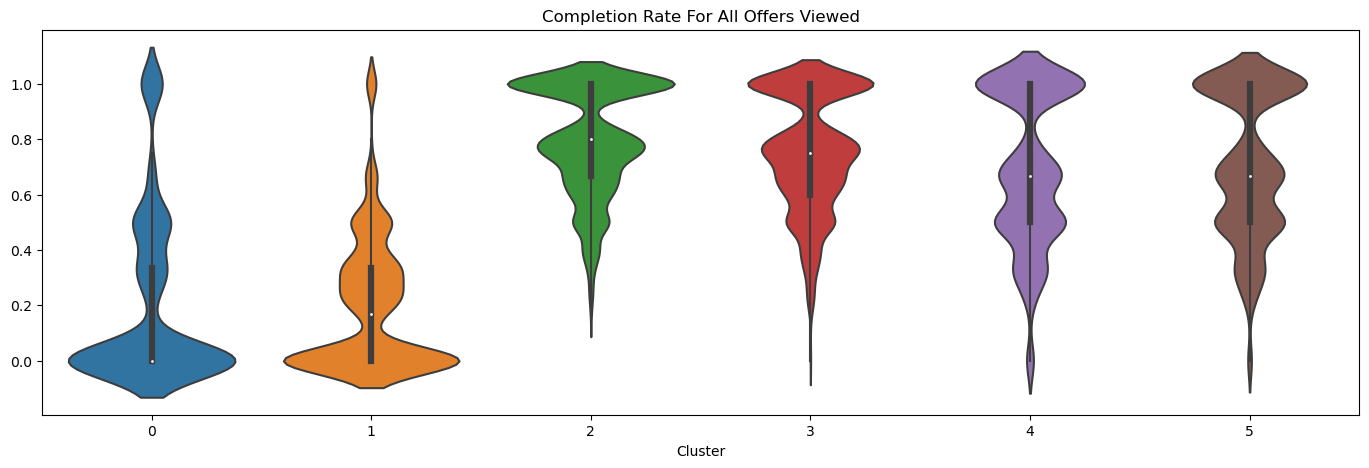

 cluster  mean  min  median  max
       0  0.21 0.00    0.00  1.0
       1  0.20 0.00    0.17  1.0
       2  0.79 0.17    0.80  1.0
       3  0.75 0.00    0.75  1.0
       4  0.69 0.00    0.67  1.0
       5  0.70 0.00    0.67  1.0


In [179]:
plot_cluster_analysis(plot='violinplot', df=coe,target_columns=['offer_viewed', 'offer_completed'],title='Completion Rate For All Offers Viewed')

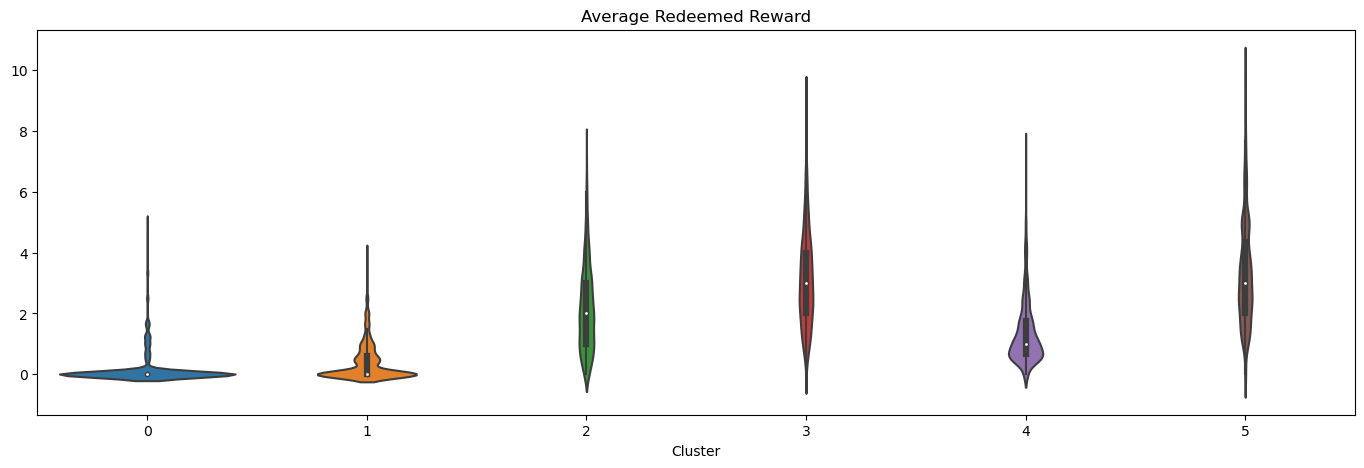

 cluster  mean  min  median   max
       0  0.16  0.0     0.0  5.00
       1  0.39  0.0     0.0  4.00
       2  2.13  0.0     2.0  7.50
       3  3.11  0.0     3.0  9.17
       4  1.33  0.0     1.0  7.50
       5  3.33  0.0     3.0 10.00


In [180]:
plot_cluster_analysis(plot='violinplot', df=coe,target_columns='redeemed_reward',title='Average Redeemed Reward')

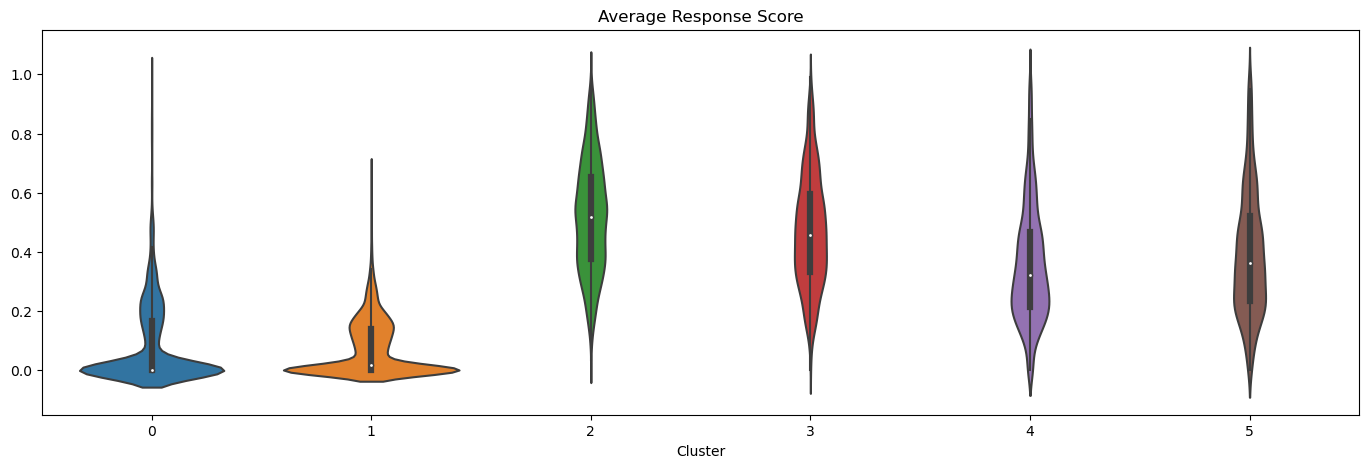

 cluster  mean  min  median  max
       0  0.08 0.00    0.00 1.00
       1  0.07 0.00    0.02 0.68
       2  0.52 0.03    0.52 1.00
       3  0.47 0.00    0.46 0.99
       4  0.36 0.00    0.32 1.00
       5  0.39 0.00    0.36 1.00


In [181]:
plot_cluster_analysis(plot='violinplot', df=coe,target_columns='response_score',title='Average Response Score')

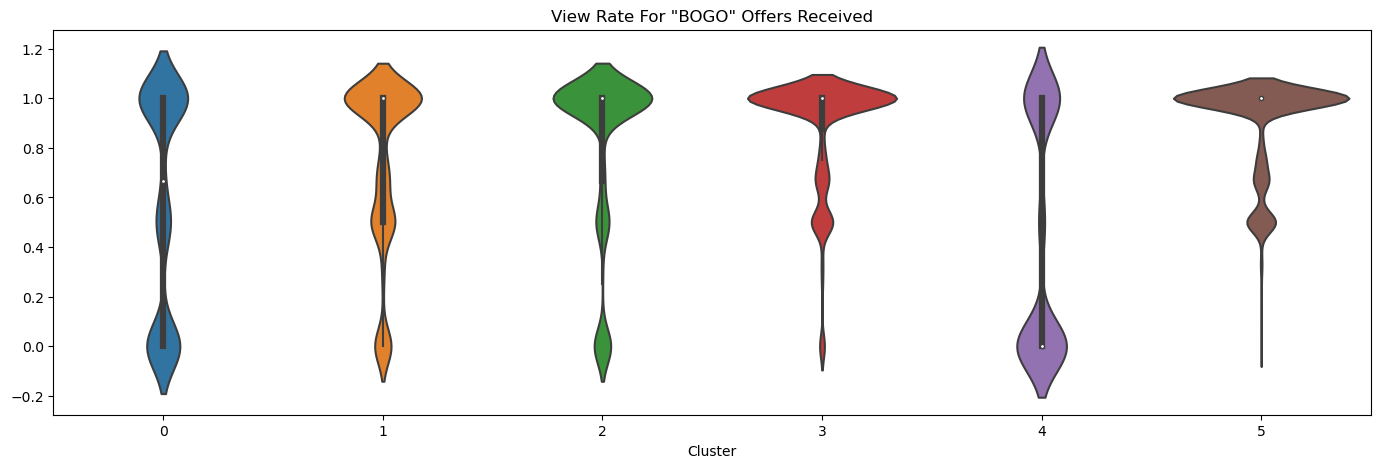

 cluster  mean  min  median  max
       0  0.58  0.0    0.67  1.0
       1  0.74  0.0    1.00  1.0
       2  0.81  0.0    1.00  1.0
       3  0.88  0.0    1.00  1.0
       4  0.43  0.0    0.00  1.0
       5  0.90  0.0    1.00  1.0


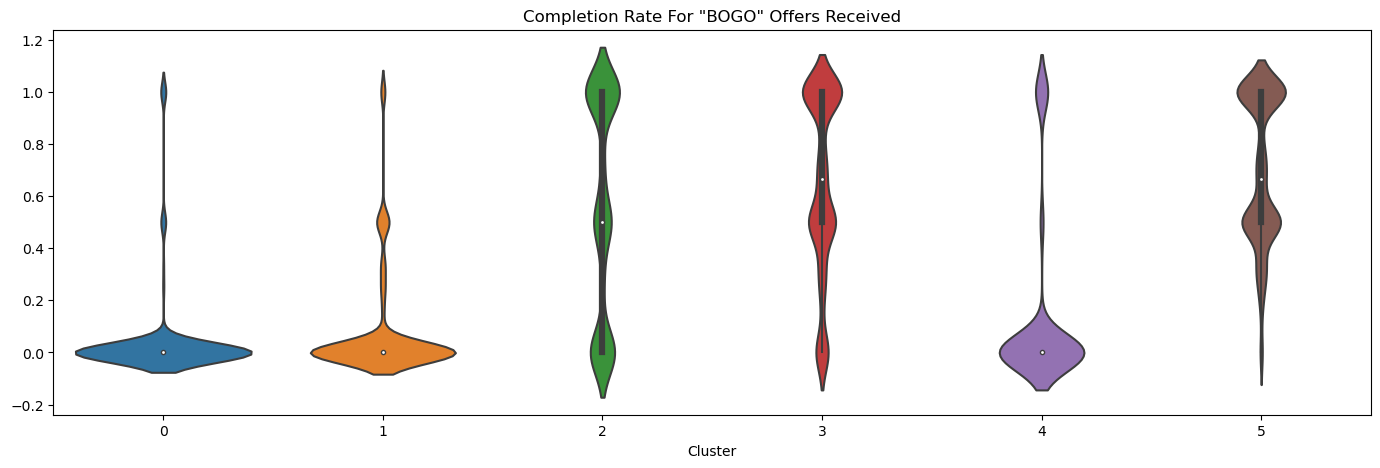

 cluster  mean  min  median  max
       0  0.04  0.0    0.00  1.0
       1  0.08  0.0    0.00  1.0
       2  0.56  0.0    0.50  1.0
       3  0.64  0.0    0.67  1.0
       4  0.14  0.0    0.00  1.0
       5  0.70  0.0    0.67  1.0


In [182]:
for column, title in zip(['bogo_offer_viewed', 'bogo_offer_completed'], ['View', 'Completion']):
    plot_cluster_analysis(plot='violinplot', df=coe,target_columns=['bogo_offer_received', column],title=f'{title} Rate For "BOGO" Offers Received')

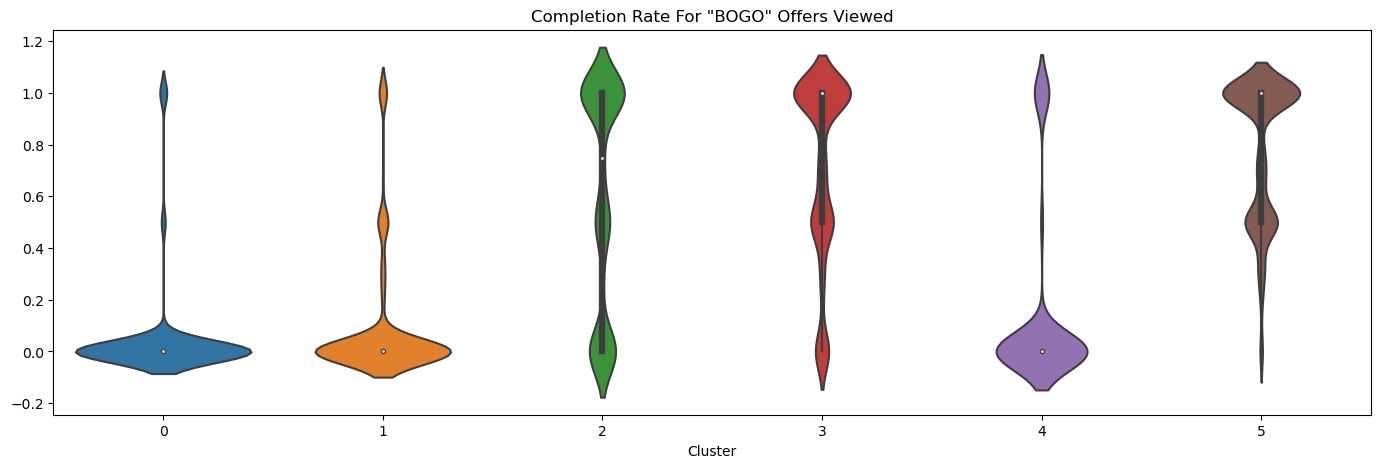

 cluster  mean  min  median  max
       0  0.05  0.0    0.00  1.0
       1  0.09  0.0    0.00  1.0
       2  0.60  0.0    0.75  1.0
       3  0.71  0.0    1.00  1.0
       4  0.14  0.0    0.00  1.0
       5  0.79  0.0    1.00  1.0


In [183]:
plot_cluster_analysis(plot='violinplot', df=coe,target_columns=['bogo_offer_viewed', 'bogo_offer_completed'],title='Completion Rate For "BOGO" Offers Viewed')

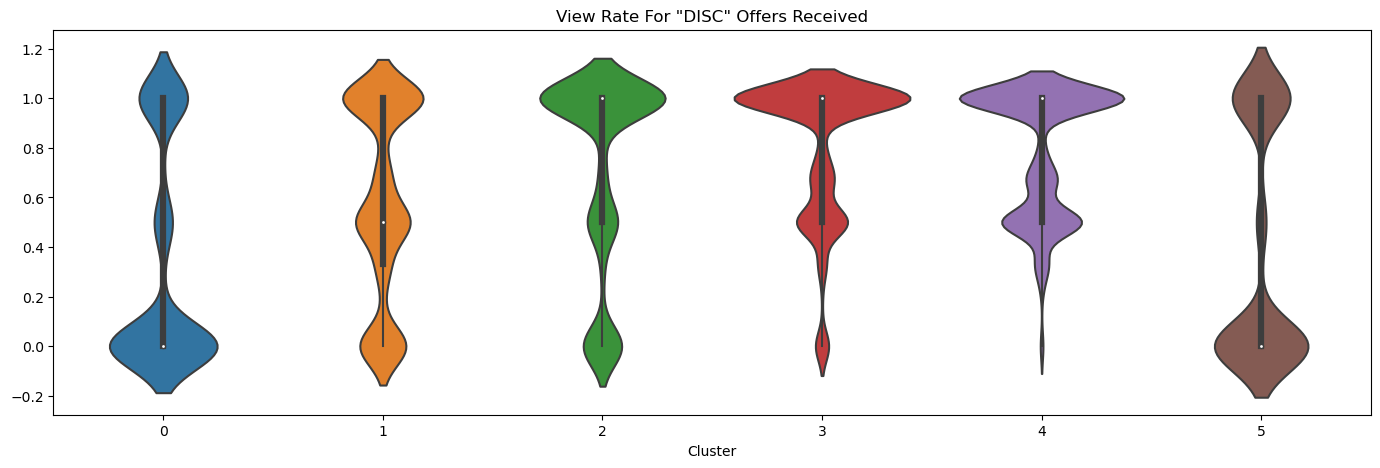

 cluster  mean  min  median  max
       0  0.33  0.0     0.0  1.0
       1  0.58  0.0     0.5  1.0
       2  0.72  0.0     1.0  1.0
       3  0.81  0.0     1.0  1.0
       4  0.78  0.0     1.0  1.0
       5  0.39  0.0     0.0  1.0


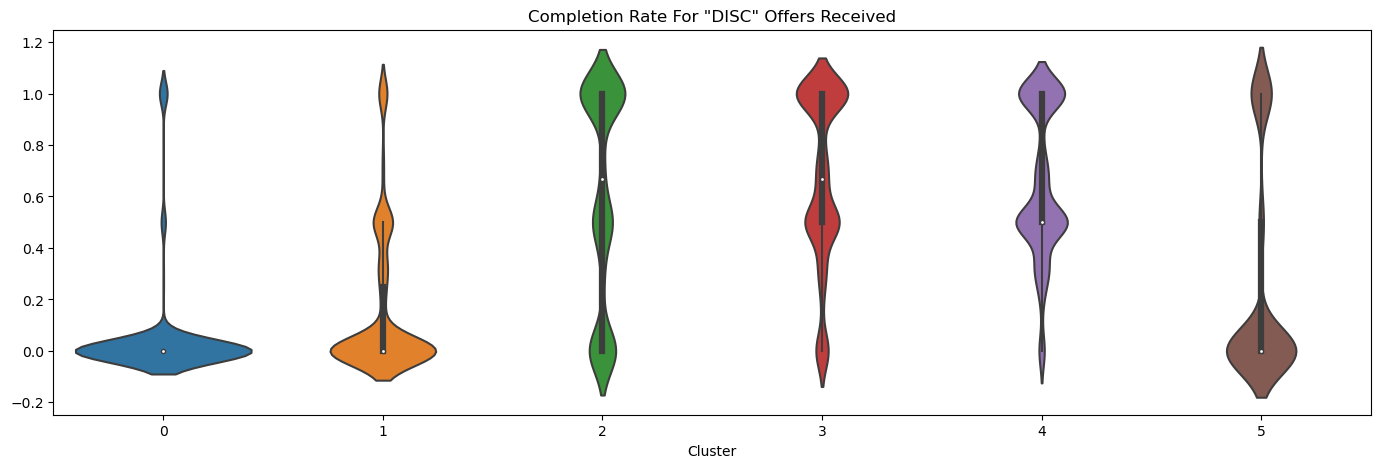

 cluster  mean  min  median  max
       0  0.05  0.0    0.00  1.0
       1  0.16  0.0    0.00  1.0
       2  0.60  0.0    0.67  1.0
       3  0.67  0.0    0.67  1.0
       4  0.65  0.0    0.50  1.0
       5  0.24  0.0    0.00  1.0


In [184]:
for column, title in zip(['disc_offer_viewed', 'disc_offer_completed'], ['View', 'Completion']):
    plot_cluster_analysis(plot='violinplot', df=coe,target_columns=['disc_offer_received', column],title=f'{title} Rate For "DISC" Offers Received')

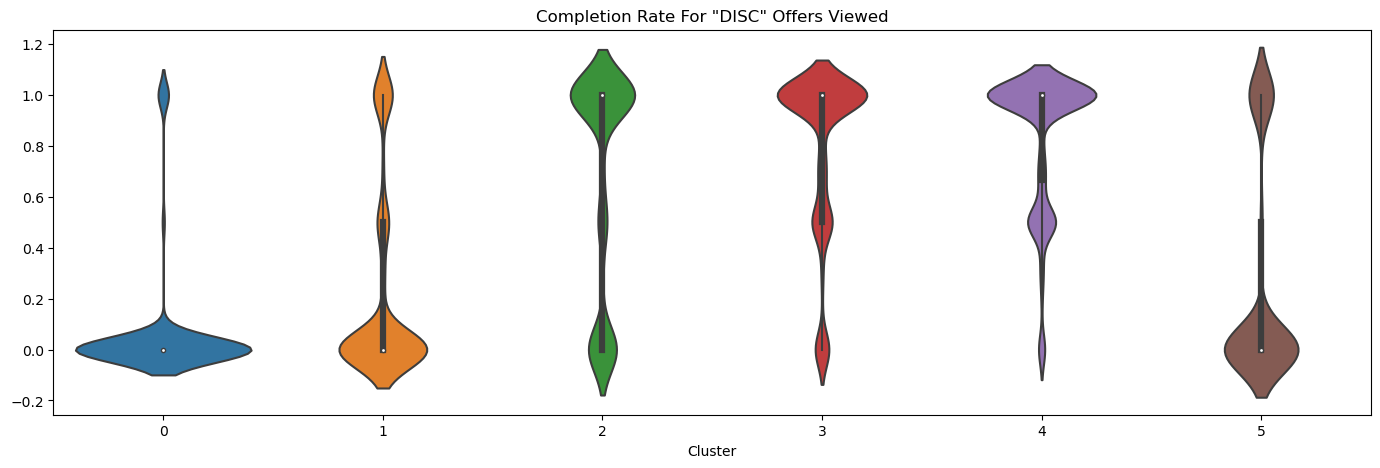

 cluster  mean  min  median  max
       0  0.06  0.0     0.0  1.0
       1  0.22  0.0     0.0  1.0
       2  0.68  0.0     1.0  1.0
       3  0.79  0.0     1.0  1.0
       4  0.83  0.0     1.0  1.0
       5  0.25  0.0     0.0  1.0


In [185]:
plot_cluster_analysis(plot='violinplot', df=coe,target_columns=['disc_offer_viewed', 'disc_offer_completed'],title='Completion Rate For "DISC" Offers Viewed')

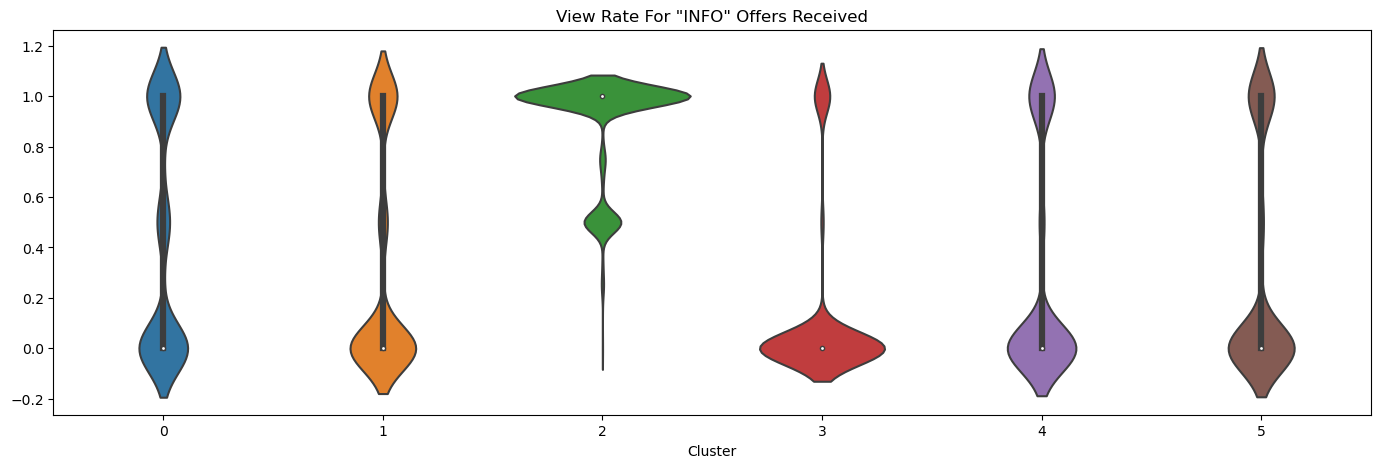

 cluster  mean  min  median  max
       0  0.42  0.0     0.0  1.0
       1  0.32  0.0     0.0  1.0
       2  0.90  0.0     1.0  1.0
       3  0.12  0.0     0.0  1.0
       4  0.28  0.0     0.0  1.0
       5  0.29  0.0     0.0  1.0


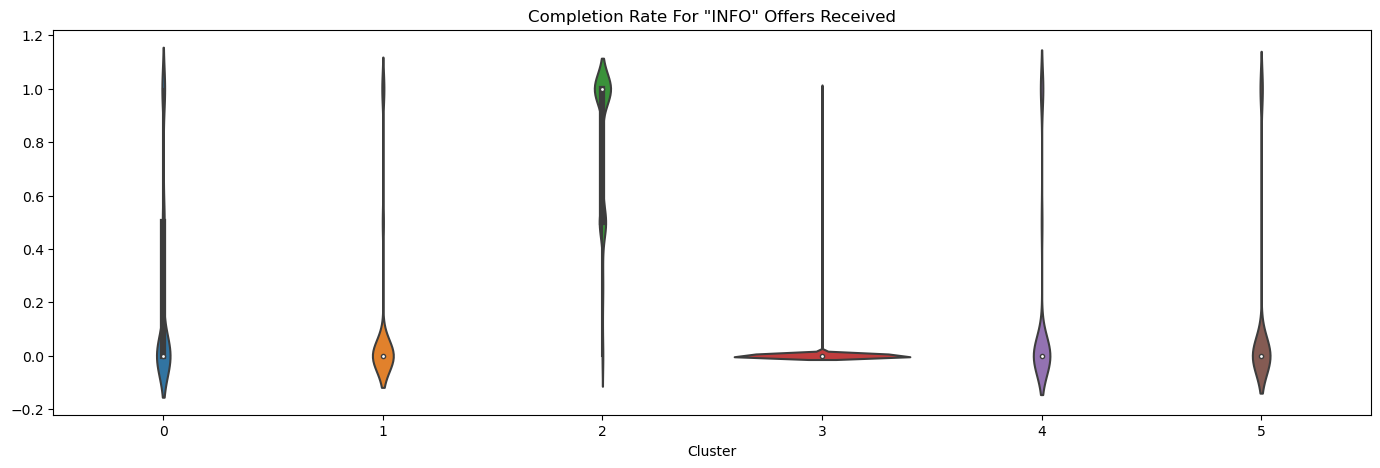

 cluster  mean  min  median  max
       0  0.20  0.0     0.0  1.0
       1  0.11  0.0     0.0  1.0
       2  0.81  0.0     1.0  1.0
       3  0.00  0.0     0.0  1.0
       4  0.14  0.0     0.0  1.0
       5  0.13  0.0     0.0  1.0


In [186]:
for column, title in zip(['info_offer_viewed', 'info_offer_completed'], ['View', 'Completion']):
    plot_cluster_analysis(plot='violinplot', df=coe,target_columns=['info_offer_received', column],title=f'{title} Rate For "INFO" Offers Received')

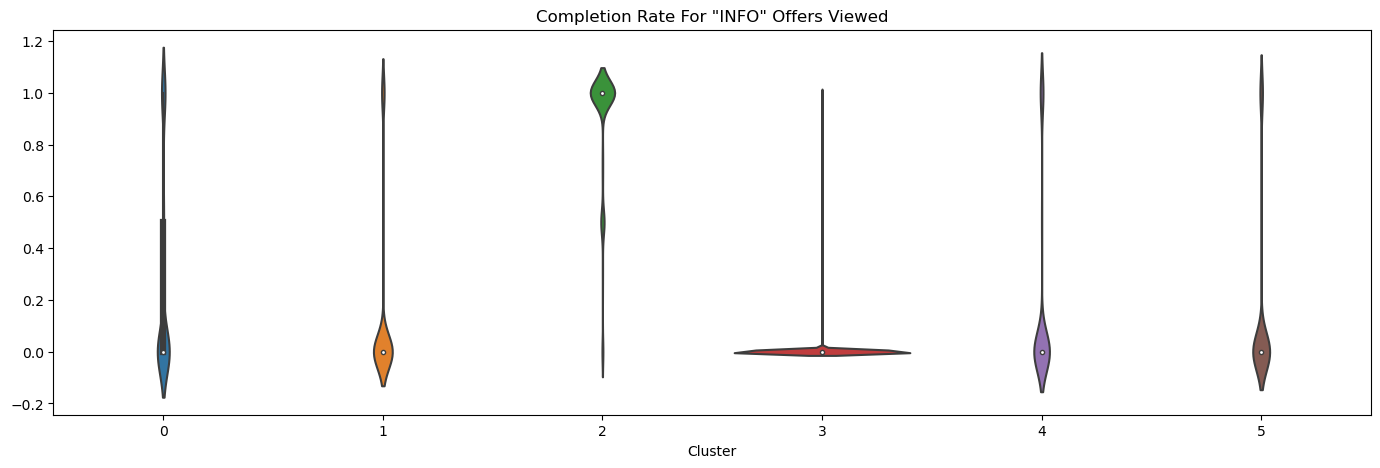

 cluster  mean  min  median  max
       0  0.24  0.0     0.0  1.0
       1  0.13  0.0     0.0  1.0
       2  0.90  0.0     1.0  1.0
       3  0.00  0.0     0.0  1.0
       4  0.16  0.0     0.0  1.0
       5  0.13  0.0     0.0  1.0


In [188]:
plot_cluster_analysis(plot='violinplot', df=coe,target_columns=['info_offer_viewed', 'info_offer_completed'],title='Completion Rate For "INFO" Offers Viewed')

In [190]:
from sklearn.preprocessing import MinMaxScaler

In [191]:
reco = pd.DataFrame()

reco['cluster'] = coe.cluster
reco['income'] = coe.income
reco['seniority'] = coe.days_member
reco['response'] = coe.response_score
reco['atv_nonpromo'] = coe.amt_nonpromo / coe.txn_nonpromo
reco['atv_promo'] = coe.amt_promo / coe.txn_promo
reco['rfm_nonpromo'] = coe.rfm_nonpromo_score
reco['rfm_promo'] = coe.rfm_promo_score
reco['view_bogo'] = coe.bogo_offer_viewed / coe.bogo_offer_received
reco['view_disc'] = coe.disc_offer_viewed / coe.disc_offer_received
reco['view_info'] = coe.info_offer_viewed / coe.info_offer_received
reco['complete_bogo'] = coe.bogo_offer_completed / coe.bogo_offer_viewed
reco['complete_disc'] = coe.disc_offer_completed / coe.disc_offer_viewed
reco['complete_info'] = coe.info_offer_completed / coe.info_offer_viewed

reco = reco.groupby('cluster').mean()

reco = pd.DataFrame(MinMaxScaler().fit_transform(reco),
                   columns=reco.columns, index=reco.index)

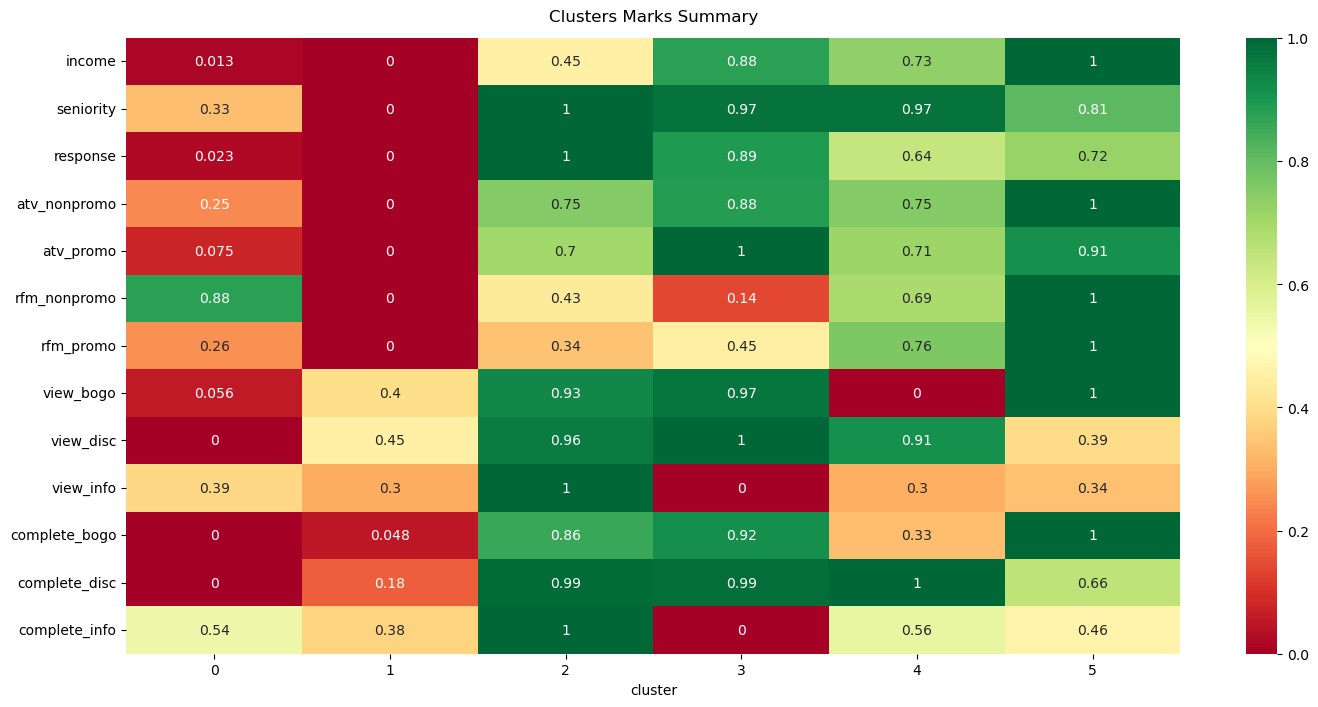

In [192]:
fig = plt.figure(figsize=(17,8))
fig = sns.heatmap(reco.T, annot=True, cmap='RdYlGn')
fig.set_title('Clusters Marks Summary', pad=12)
fig.set_ylim(len(reco.T), 0)
plt.show()

# With the help of the plot above and previously collected data, summary of each cluster is as follows:

Cluster 0: This cluster represents good business value to the company. Their income is fairly high, they are senior members in the program, and they respond fairly quick to offers. They spend an average of \\$11.6 and \\$17.25 in non-promo and promo periods respectively exhibiting an increase in RFM score of 46% between the two periods. This cluster of customers is most interested in "disc" offers being with the best completion rate out of all clusters for these type of offers. They respond fairly to "info" offers, but not so for "bogo" offers.

Cluster 1: This cluster seems to be formed of low-income, low-spenders, and recent-members who does not seem to be tempted by any offer type. Their average spend in both non-promo and promo periods is almost \\$7.50 exhibiting an increase in RFM score of only 6\% between the two periods.

Cluster 2: This cluster of customers respond very well to all offers type. In a good way too, with an average spend of $8.92 and \\$17.20 in non-promo and promo periods respectively exhibiting an increase in RFM score of 81\% between the two periods. They are the most senior members of the program and the fastest to respond to offers. Worth noting in particular, this cluster of customers respond extremely well to "info" offers.

Cluster 3: This cluster of customers arguably represents the best business value for the company non-promo periods. They are the highest spenders in non-promo periods with an average spend of //$16.67 miles ahead of most clusters. Their avergae spend increases to second highest \\$20.34 in promo periods. They have the highest income of all clusters and they respond to offers fairly fast. They are most interested in "bogo" and to a lesser extent "disc" offers, but not so much so for "info" offers.

Cluster 4: This cluster of customer seems to be only active during promo periods. Their average spend in non-promo is low \\$5.66 but that jumps to highest average spend among clusters in promo periods \\$21.23 exhibiting an increase in RFM score of 226\% between the two periods. They are equally highly interested in "bogo" and "disc" offers but not tempted by "info" offers at all. They are formed of high income and senior members who respond fast to offers.

Cluster 5: This cluster seems to be formed of customers who are completely inactive during non-promo periods with anvrage spend of lowest \\$1.23. That increase to, still lowest, $6.48 average spend in promo periods. Hence an increase in RFM score of 360\% but that is due to very low average spend in non-promo periods to begin with. Their view and completion rates are among the lowest if not the lowest. This affects their response score being also among the lowest. Also, does not exhibit a pattern by which it can be said they favor a specific offer type. This cluster of customers seem to be a prime target for further and separate investigation.

In [197]:
from sklearn.manifold import TSNE

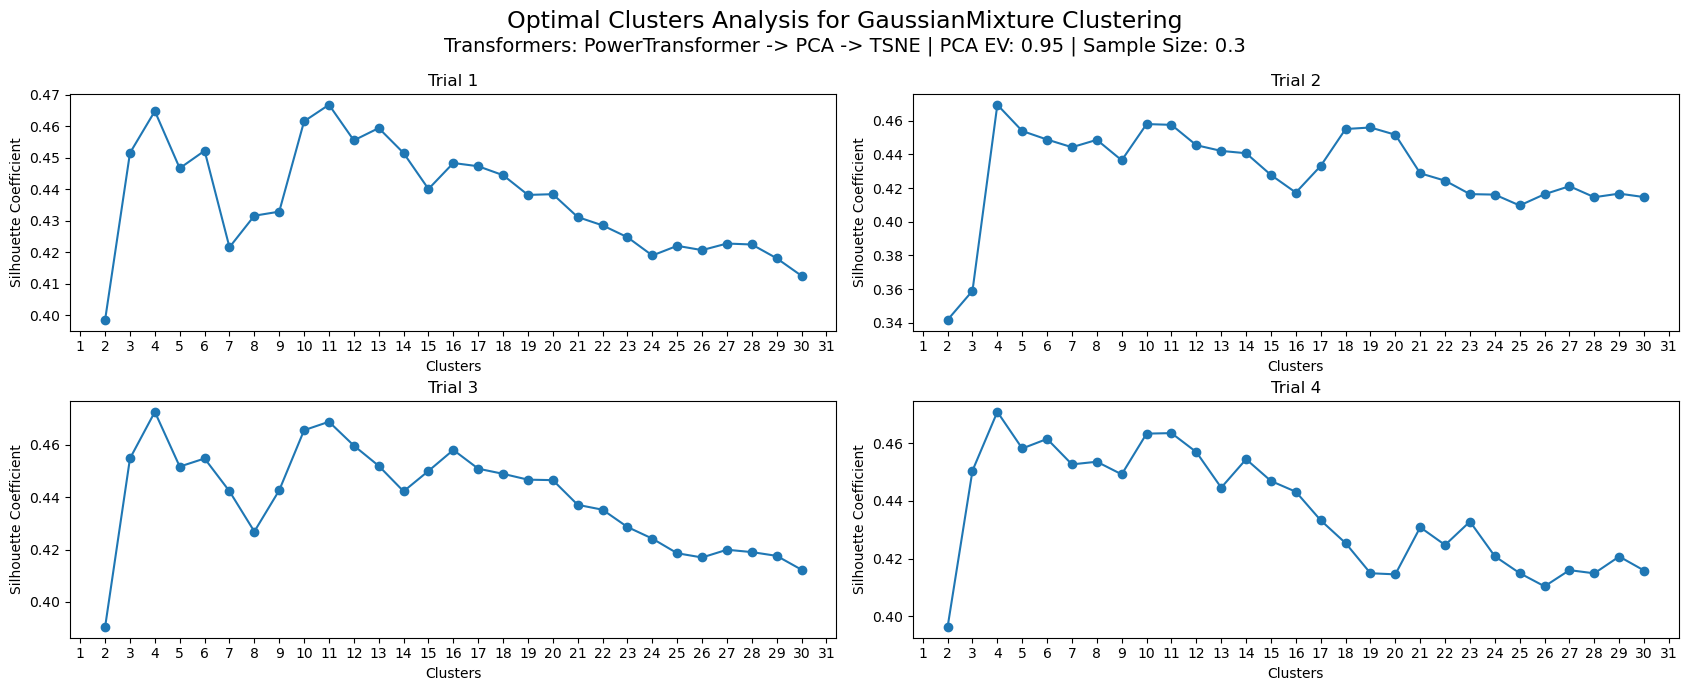

In [198]:
plot_optimization_analysis(df = coe,est = 'GaussianMixture',ev = 0.95,tsne = True,sample_size = 0.3)

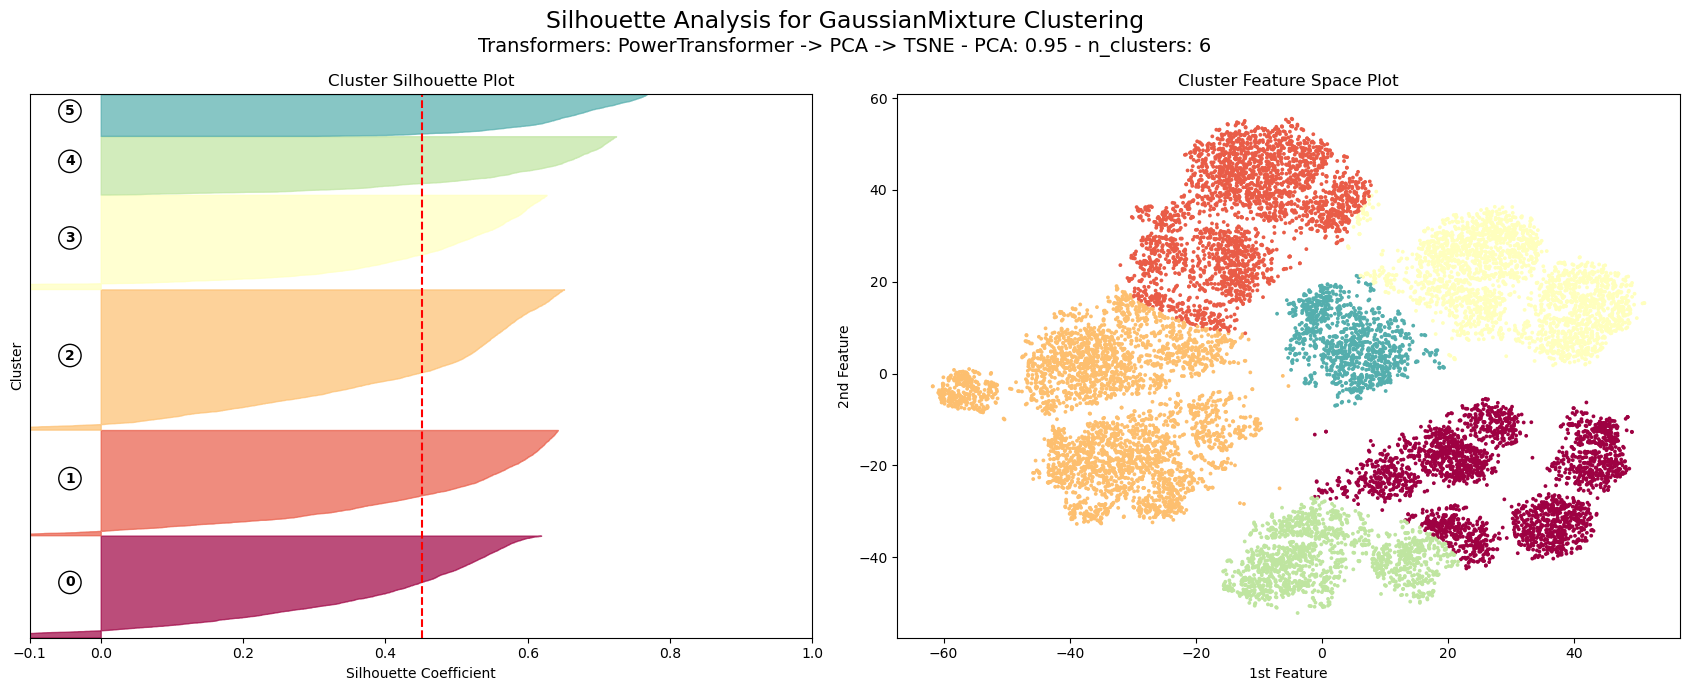

In [199]:
plot_silhouette_analysis(df = coe,est = 'GaussianMixture',ev = 0.95,tsne = True,n_clusters = 6)

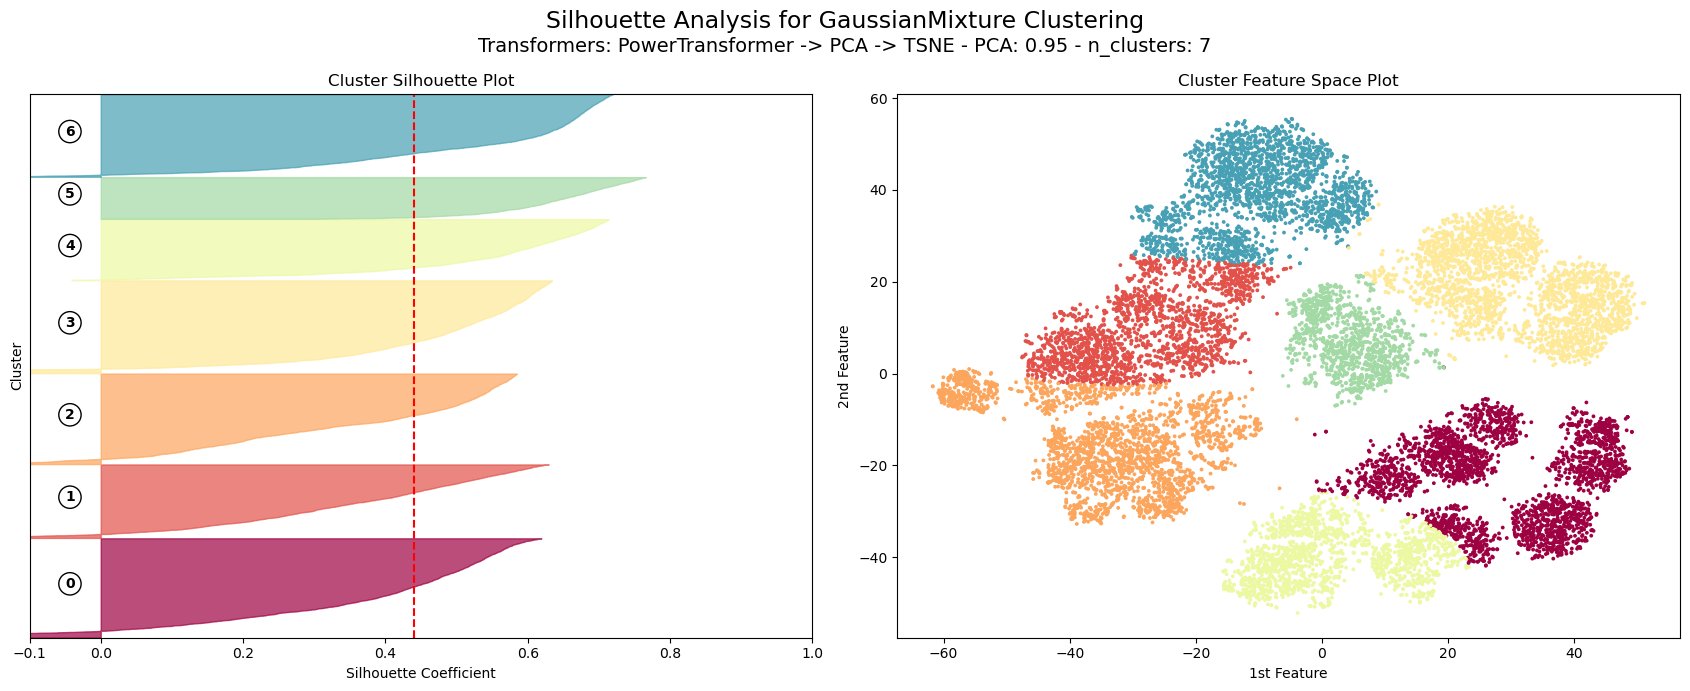

In [200]:
plot_silhouette_analysis(df = coe,est = 'GaussianMixture',ev = 0.95,tsne = True,n_clusters = 7)